In [1]:

##  портируем библиотеки 
import pandas as pd    
import numpy as np
import matplotlib.pyplot as plt


In [2]:
## тут формируем датасеты 

start_data = pd.read_csv("DataanyvalCSVD1_GBPJPY.csv", sep = ';')

In [3]:
start_data.shape ## смотрим размер исходных данных 

(3060, 4)

In [4]:
type(start_data)

pandas.core.frame.DataFrame

In [5]:
start_data.head()    ### чтобы быстро посмотреть head()  or tail()

Number        DAte  Pr(GBP/jpy)  Vol(GBP/JPY)
0       1  1223596800      169.080       96043.0
1       2  1223856000      173.165       56223.0
2       3  1223942400      179.130       63596.0
3       4  1224028800      174.750       72257.0
4       5  1224115200      173.320       91684.0

In [6]:
dataD1 = pd.DataFrame(start_data, columns = ['Number', 'Pr(GBP/jpy)'])   ## выбираем нужные колонки присваиваем их новому сету

In [7]:
print(type(dataD1))
print(dataD1.shape)

<class 'pandas.core.frame.DataFrame'>
(3060, 2)


In [8]:
dataD1.tail()  ### чтобы быстро посмотреть head()  or tail()

Number  Pr(GBP/jpy)
3055    3056     136.2165
3056    3057     135.5930
3057    3058     135.4680
3058    3059     135.7085
3059    3060     136.0530

In [9]:
## diferent  variables 
arr_size = 2999   ## full data size for array (fibo)  //  размер общего массива 
arr_l = 50        ## one day data size  //  размер массива для одного дня 
result_size = 12   ## predicted size  ///размер массива предсказаний 

In [10]:
##создаем пустые массивы 
raw_data = np.zeros((arr_size, arr_l))         ## array to data 
raw_results = np.zeros((arr_size,result_size))    ## array to results  

In [11]:
raw_data.shape

(2999, 50)

In [12]:
## наполняем массив задач 
for i in range (arr_size): 
    slice_data = dataD1.iloc[i : i + arr_l, -1]
    slice_data_to_arr = np.asarray(slice_data)
    ##print(slice_data_to_arr)
    ##print(slice_data_to_arr.shape)
    raw_data[i] = slice_data_to_arr

In [13]:
## наполняем массив ответов 
for i in range (arr_size):
    slice_data = dataD1.iloc[i + arr_l : i + arr_l + result_size, -1]
    raw_results[i] = np.asarray(slice_data)
##print(raw_results)

In [14]:
## here we download latest data  // тут подгружаем последние актуальные данные 

In [15]:
new_data_df_real = pd.read_csv('C:\\Users\\User\\AppData\\Roaming\\MetaQuotes\\Terminal\\287469DEA9630EA94D0715D755974F1B\\MQL4\\Files\\GBPJPY_D1_last50.csv',
                              delimiter = ',', names = ['MA_value'])

In [16]:
## creating new array for latest data 
new_data_arr_real = np.zeros((1, 50))    ## пустой массив для новых данных 
new_data_arr_real[0] = new_data_df_real.iloc[0 : 50, 0]  ##  fill the array with data

In [17]:
## watching  last data
new_data_arr_real

array([[135.9375, 136.2165, 135.593 , 135.468 , 135.7085, 136.053 ,
        136.7115, 137.979 , 138.3675, 138.3255, 138.479 , 138.762 ,
        138.2885, 138.348 , 138.9035, 139.1835, 139.6515, 139.66  ,
        139.193 , 139.1005, 139.356 , 139.2035, 139.0835, 138.6325,
        139.1775, 139.954 , 140.2605, 140.8   , 141.2455, 142.007 ,
        141.475 , 141.154 , 140.756 , 140.276 , 138.7785, 137.532 ,
        136.946 , 136.0645, 136.007 , 135.9115, 135.995 , 135.371 ,
        135.54  , 134.4185, 133.6905, 133.863 , 134.1165, 134.3105,
        135.2775, 135.785 ]])

In [18]:
raw_data.shape

(2999, 50)

In [19]:
## forming sets for traing and validation
block_size = 610  ## fibo 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946

train_data_1 = (raw_data[ : block_size]).copy()
train_data_2 = (raw_data[block_size :block_size * 2]).copy()
train_data_3 = (raw_data[block_size * 2 :block_size * 3]).copy()
train_data_4 = (raw_data[block_size * 3 :block_size * 4]).copy()

train_results_1 = (raw_results[ : block_size]).copy()
train_results_2 = (raw_results[block_size : block_size * 2]).copy()
train_results_3 = (raw_results[block_size * 2 : block_size * 3]).copy()
train_results_4 = (raw_results[block_size * 3 : block_size * 4]).copy()

validation_data = (raw_data[2500 : ]).copy()
validation_results = (raw_results[2500 : ]).copy()

In [20]:
train_results_4.shape

(610, 12)

In [21]:
## checing form sets

print(train_data_1.shape)
print(train_data_2.shape)
print(train_data_3.shape)
print(train_data_4.shape)

print(train_results_1.shape)
print(train_results_2.shape)
print(train_results_3.shape)
print(train_results_4.shape)

print(validation_data.shape)
print(validation_results.shape)


(610, 50)
(610, 50)
(610, 50)
(610, 50)
(610, 12)
(610, 12)
(610, 12)
(610, 12)
(499, 50)
(499, 12)


In [22]:

## train_data_normalize = train_data.copy()
## train_results_normalize = train_results.copy()

## ean = np.mean(train_data_normalize)
##std = np.std(train_data_normalize)

##train_data_normalize -= mean
##train_data_normalize /= std

##train_results_normalize -= mean
#train_results_normalize /= std

In [23]:
## print('mean = ', mean)
## print('std = ', std)

In [24]:
## function reterned
def PlotChart(data_for_first_curve, data_for_second_curve):
    plt.plot(os_x_for_predict, data_for_first_curve, 'r', label = 'predict ')   ## Draw a prediction curve
    plt.plot(os_x_for_predict, data_for_second_curve, 'g', label = 'real')      ## Draw a real curve
    plt.legend()
    plt.show()

In [25]:
### models with  using scikit-learn

In [26]:
from sklearn.neighbors import KNeighborsRegressor

In [27]:
neigbors_count = 1

In [28]:
model_1_KNR = KNeighborsRegressor(n_neighbors = neigbors_count)
model_1_KNR.fit(train_data_1, train_results_1)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

In [29]:
model_2_KNR = KNeighborsRegressor(n_neighbors = neigbors_count)
model_2_KNR.fit(train_data_2, train_results_2)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

In [30]:
model_3_KNR = KNeighborsRegressor(n_neighbors = neigbors_count)
model_3_KNR.fit(train_data_3, train_results_3)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

In [31]:
model_4_KNR = KNeighborsRegressor(n_neighbors = neigbors_count)
model_4_KNR.fit(train_data_4, train_results_4)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

In [32]:
prediction_1_KNR = model_1_KNR.predict(validation_data)
prediction_2_KNR = model_2_KNR.predict(validation_data)
prediction_3_KNR = model_3_KNR.predict(validation_data)
prediction_4_KNR = model_4_KNR.predict(validation_data)

In [33]:
##prediction_1KNR

In [34]:
os_x_for_predict = []
for i in range(12):
    os_x_for_predict.append(i)

In [35]:
#import time

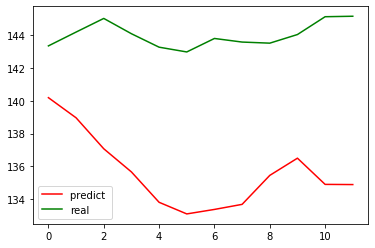

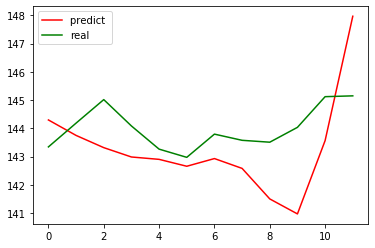

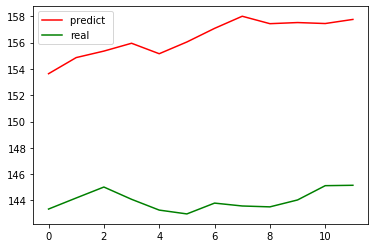

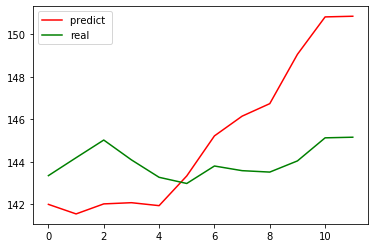

In [36]:
#for i in range(10):
predict_num = 12
PlotChart(prediction_1_KNR[predict_num], validation_results[predict_num])
PlotChart(prediction_2_KNR[predict_num], validation_results[predict_num])
PlotChart(prediction_3_KNR[predict_num], validation_results[predict_num])
PlotChart(prediction_4_KNR[predict_num], validation_results[predict_num])
    #time.sleep(0.5)

In [37]:
validation_data[0]

array([145.385 , 146.359 , 146.5585, 147.415 , 147.4985, 146.7555,
       147.1695, 147.517 , 147.543 , 147.2165, 146.67  , 146.5395,
       145.413 , 145.0935, 145.3925, 146.0315, 145.43  , 145.355 ,
       145.0625, 144.209 , 145.327 , 145.8275, 145.822 , 145.9535,
       146.344 , 146.3885, 146.827 , 147.2885, 147.4565, 148.3305,
       148.173 , 148.831 , 148.3215, 147.5375, 146.864 , 146.306 ,
       146.037 , 145.8805, 146.125 , 146.083 , 145.5355, 145.584 ,
       146.154 , 146.719 , 145.813 , 145.018 , 144.3795, 144.1125,
       143.4925, 142.9105])

In [38]:
prediction_1_KNR[0]

array([139.8135, 139.2625, 140.114 , 140.4155, 140.2925, 140.821 ,
       141.026 , 141.636 , 142.8375, 142.0055, 141.67  , 141.4675])

In [39]:
abs(prediction_1_KNR[0, 0] - validation_data[0, - 1])

3.0970000000000084

In [40]:
delta_prediction_1_KNR = prediction_1_KNR.copy()
delta_prediction_2_KNR = prediction_2_KNR.copy()
delta_prediction_3_KNR = prediction_3_KNR.copy()
delta_prediction_4_KNR = prediction_4_KNR.copy()

for i in range(len(prediction_1_KNR)):
    delta_1 = (prediction_1_KNR[i, 0] - validation_data[i, - 1])
    delta_2 = (prediction_2_KNR[i, 0] - validation_data[i, - 1])
    delta_3 = (prediction_3_KNR[i, 0] - validation_data[i, - 1])
    delta_4 = (prediction_4_KNR[i, 0] - validation_data[i, - 1])
    delta_prediction_1_KNR[i] = prediction_1_KNR[i] - delta_1
    delta_prediction_2_KNR[i] = prediction_2_KNR[i] - delta_2
    delta_prediction_3_KNR[i] = prediction_3_KNR[i] - delta_3
    delta_prediction_4_KNR[i] = prediction_4_KNR[i] - delta_4

In [41]:
## Here we creating new array and fillig on mean predictions values 
## Здесь мы создаем новый массив и заполняем его средними значениями прогнозов.
mean_prediction = np.zeros((len(delta_prediction_1_KNR), len(delta_prediction_1_KNR[0])))  ## creating new array
for i in range(len(mean_prediction)):
    for j in range(len(mean_prediction[0])):
        mean_prediction[i, j] = (delta_prediction_1_KNR[i, j] +
                             delta_prediction_2_KNR[i, j] +  
                             delta_prediction_3_KNR[i, j] + 
                             delta_prediction_4_KNR[i, j])/4

In [42]:
##delta_prediction_1_KNR[200]

In [43]:
#delta_prediction_4_KNR[200]


In [44]:
## PlotChart(delta_prediction_2_KNR[10], prediction_2_KNR[10])

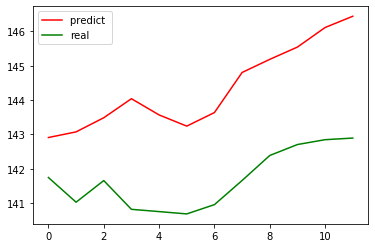

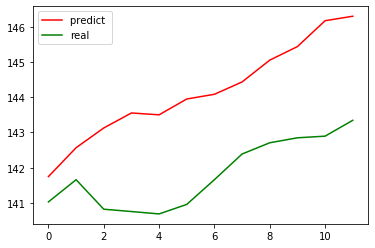

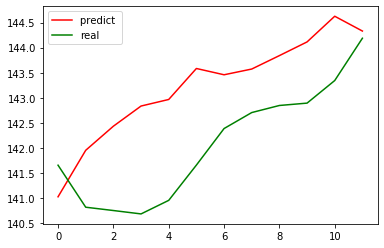

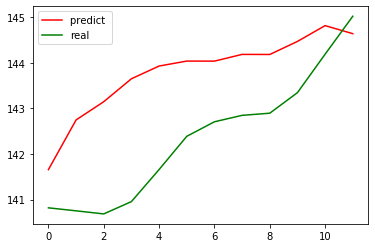

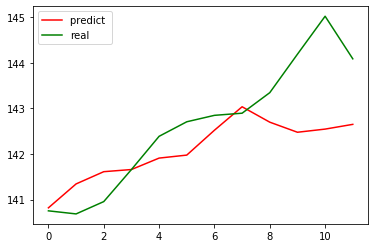

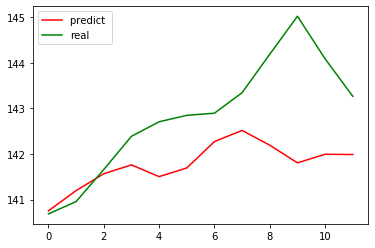

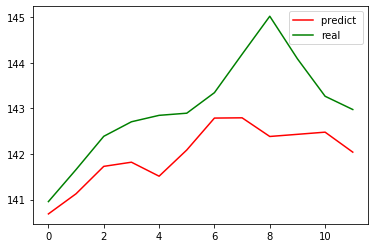

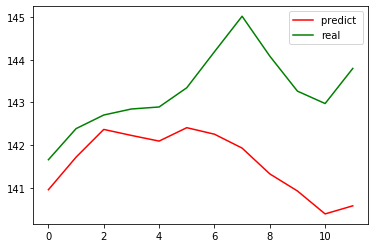

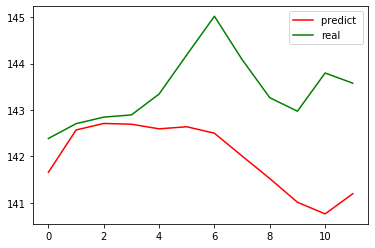

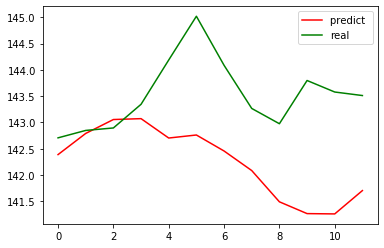

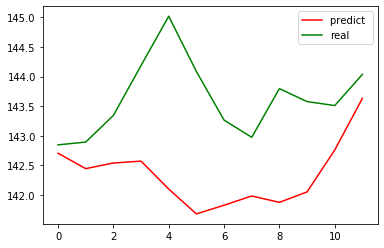

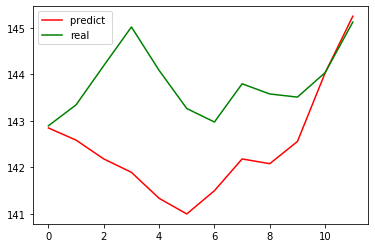

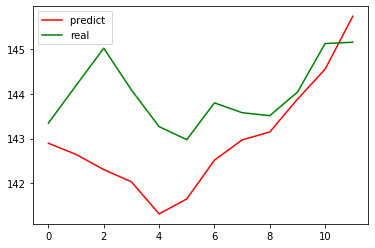

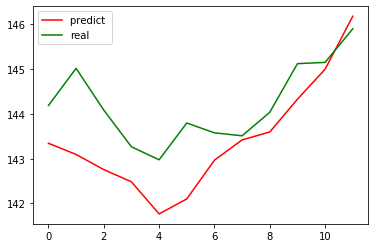

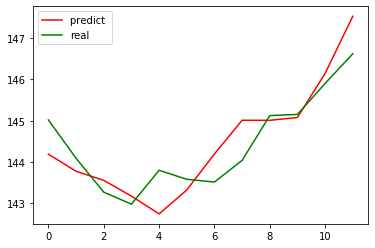

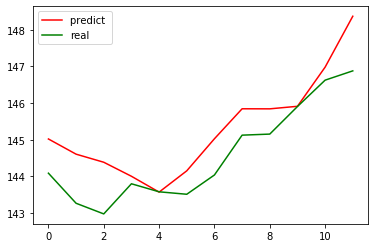

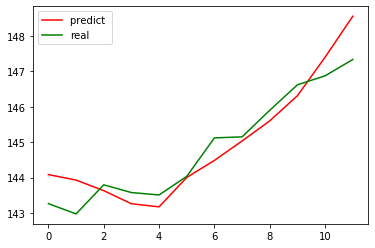

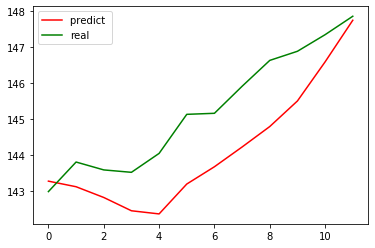

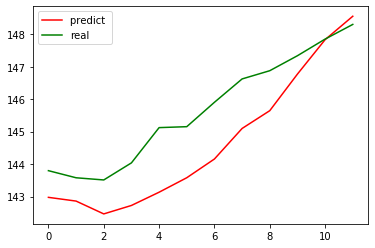

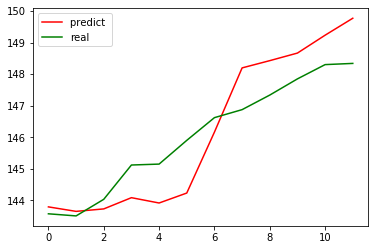

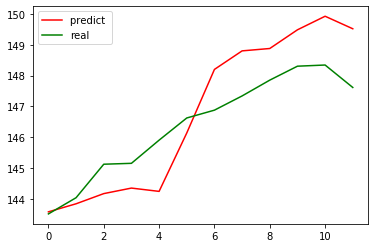

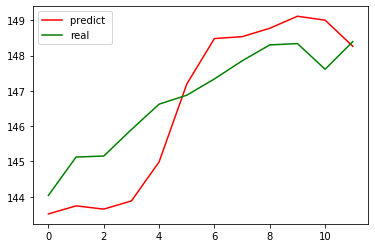

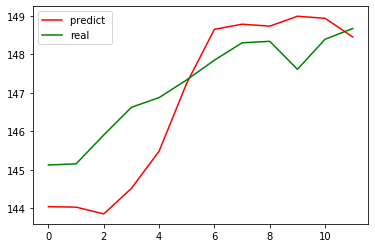

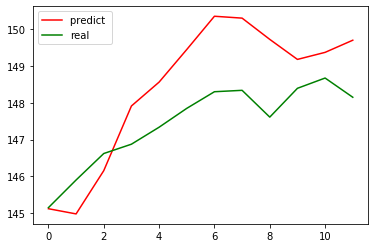

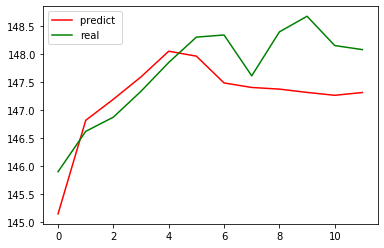

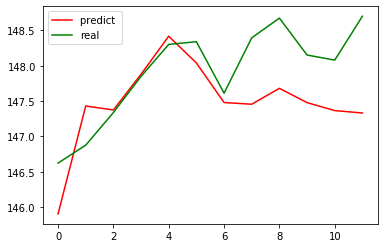

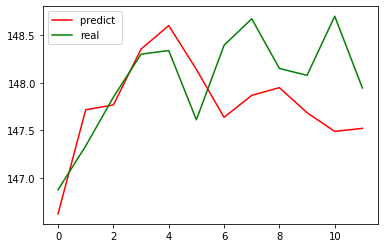

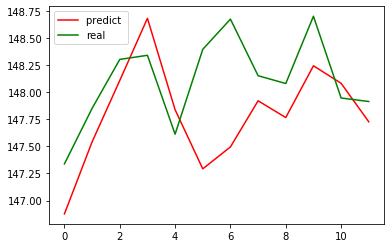

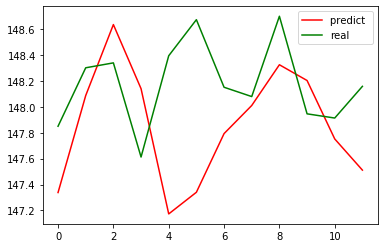

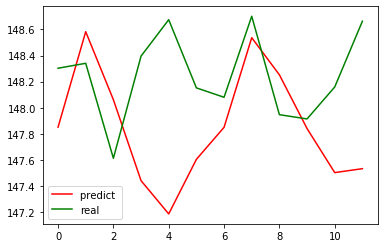

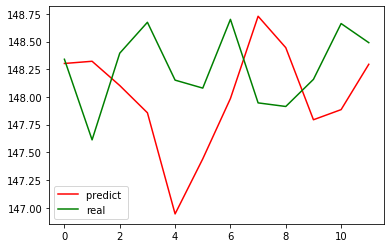

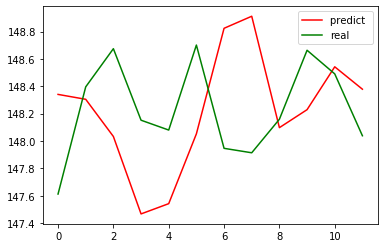

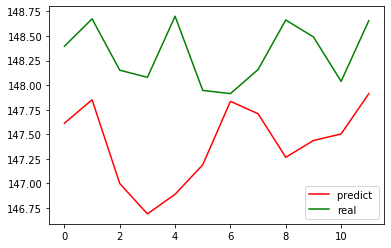

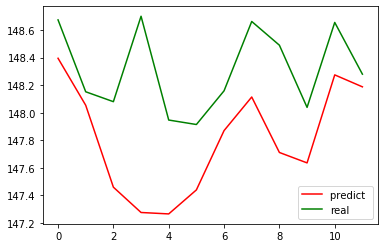

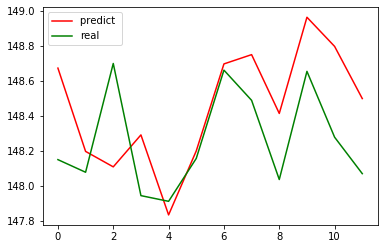

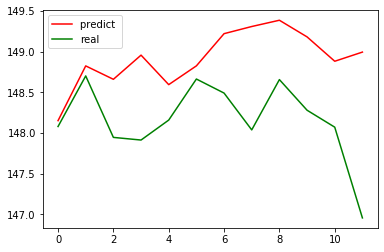

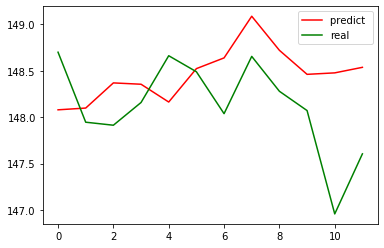

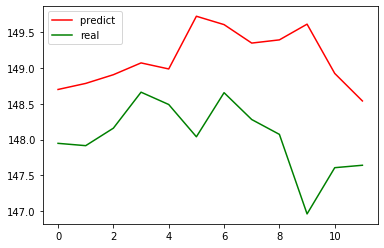

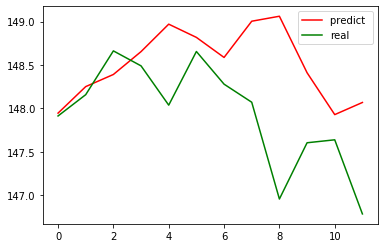

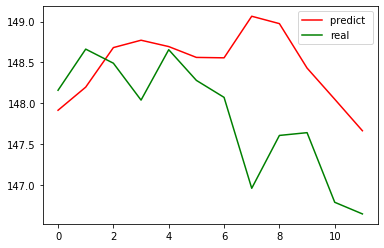

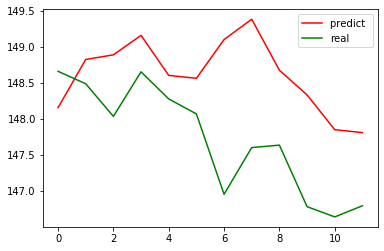

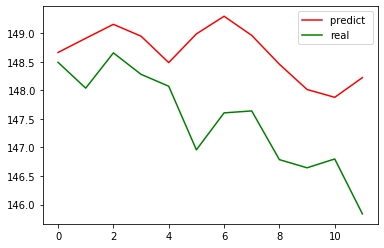

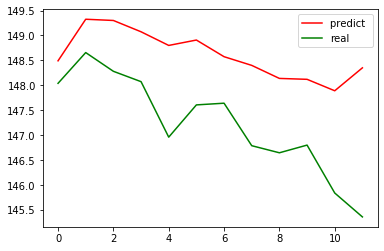

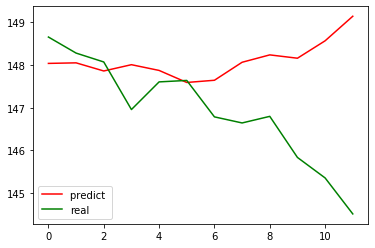

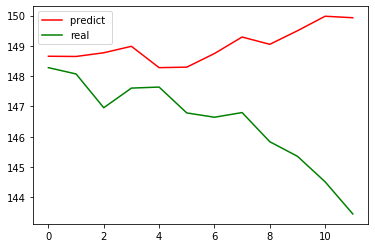

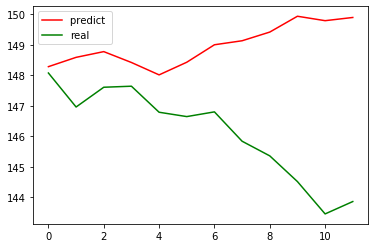

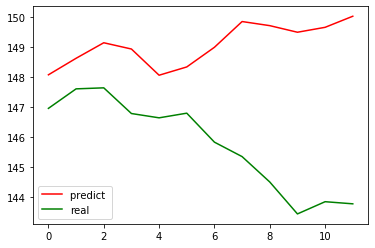

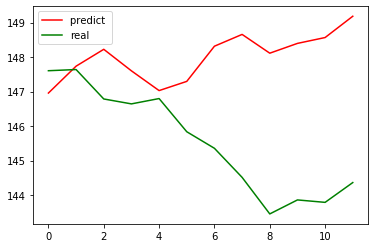

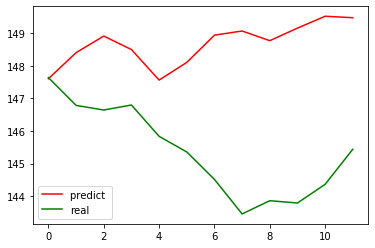

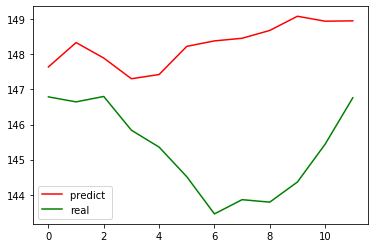

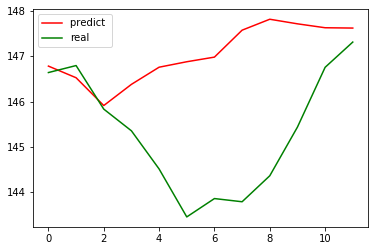

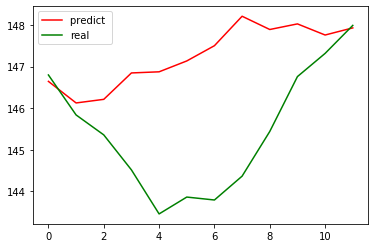

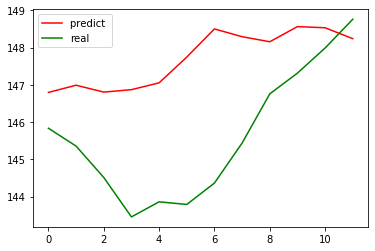

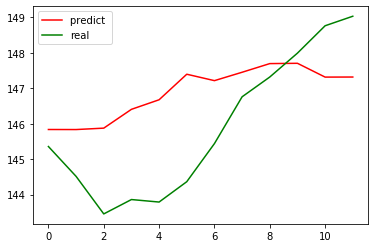

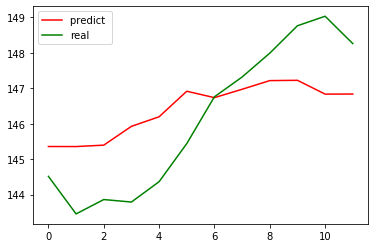

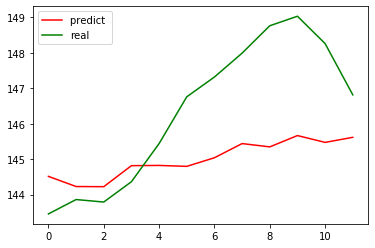

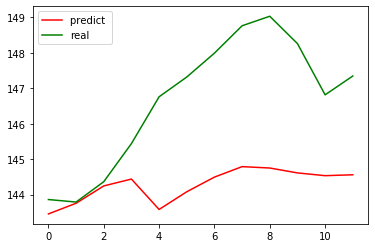

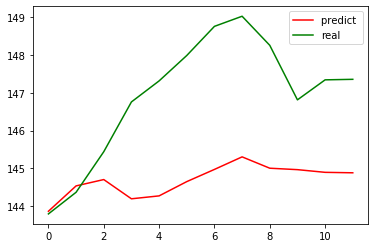

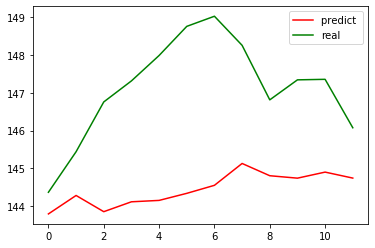

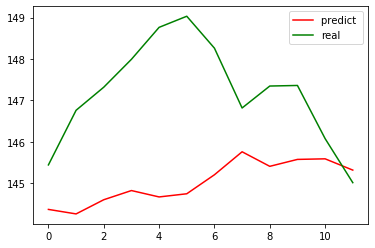

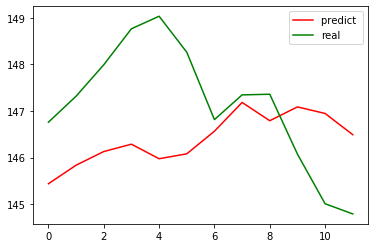

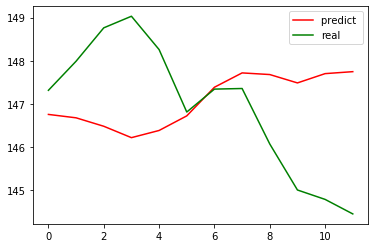

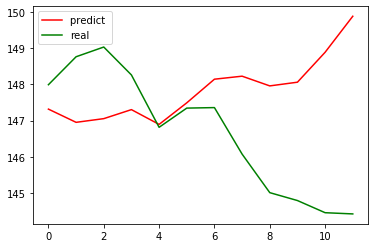

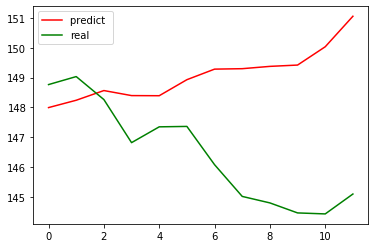

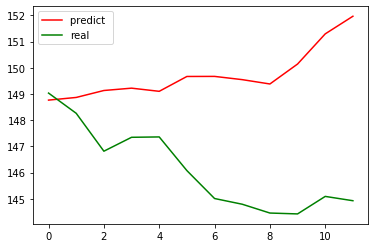

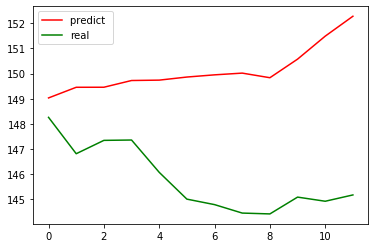

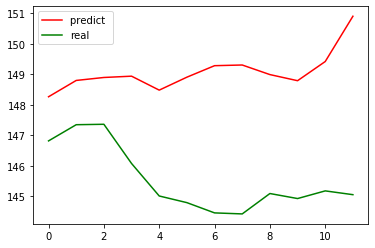

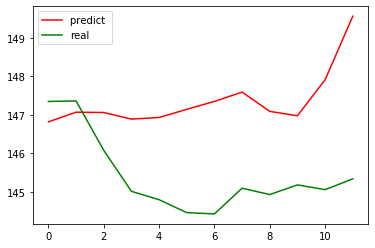

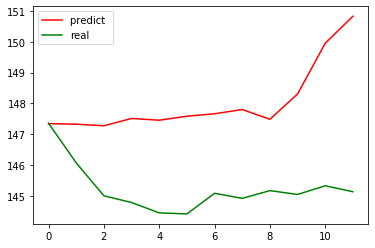

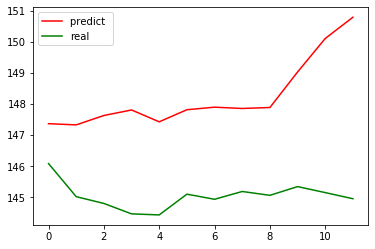

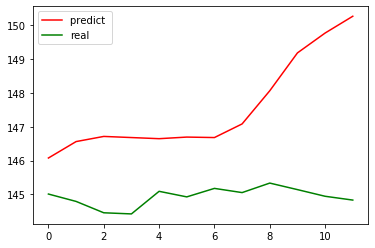

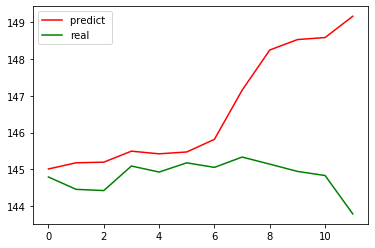

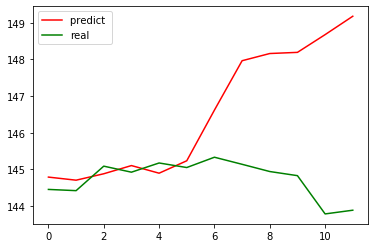

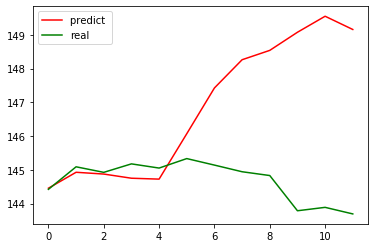

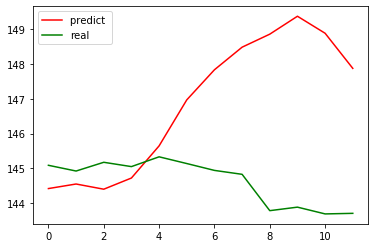

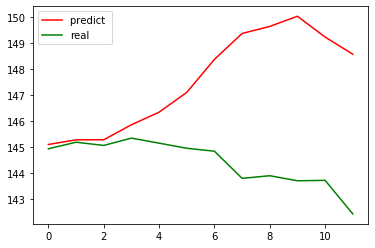

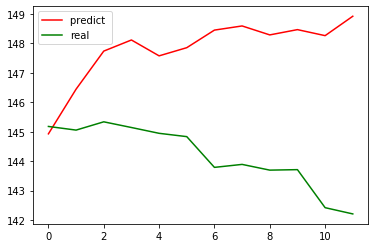

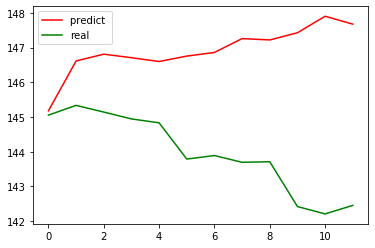

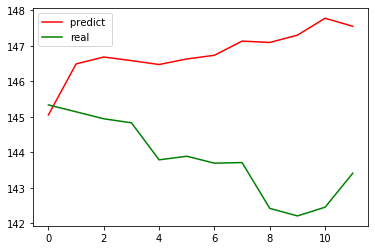

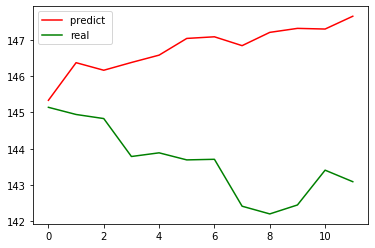

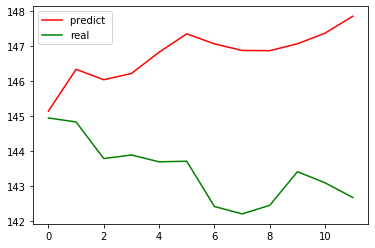

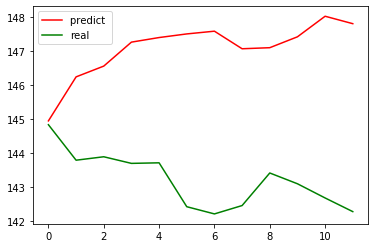

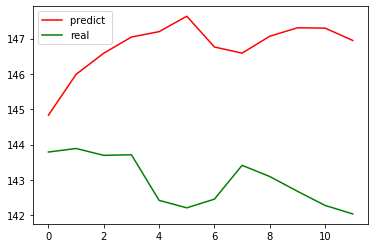

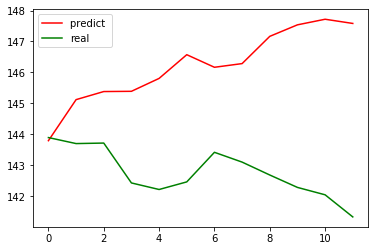

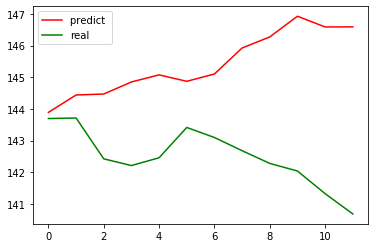

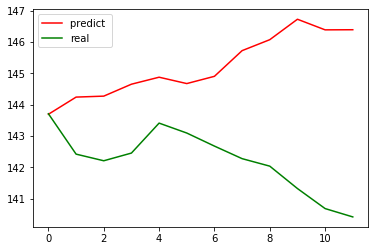

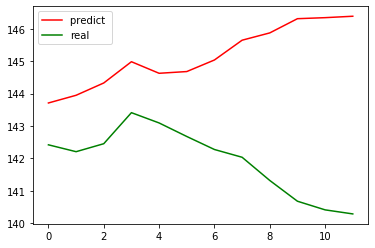

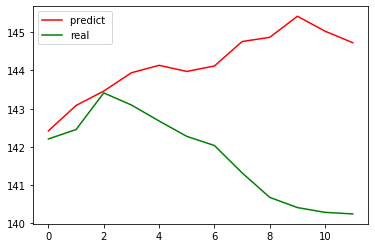

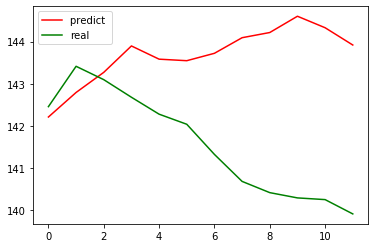

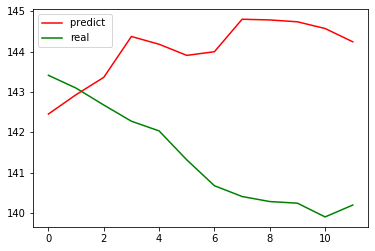

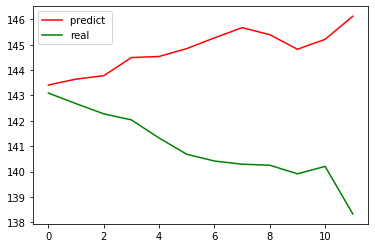

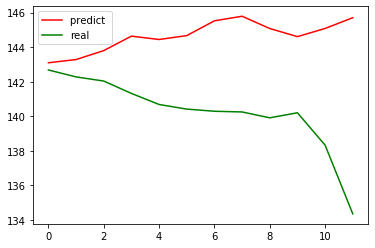

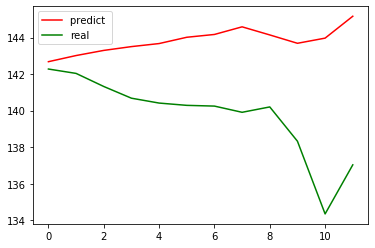

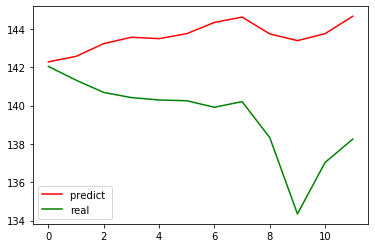

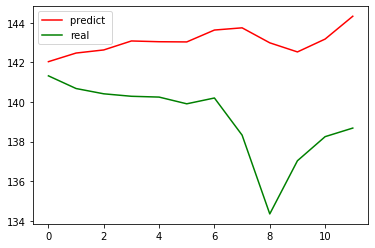

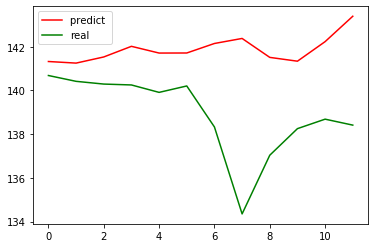

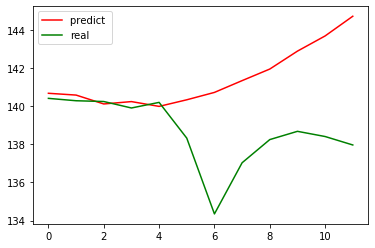

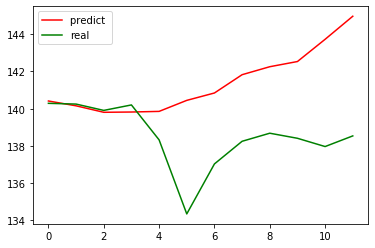

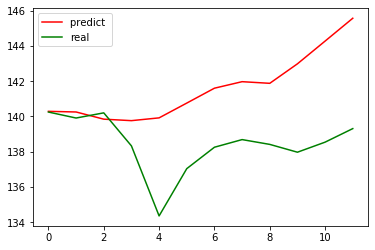

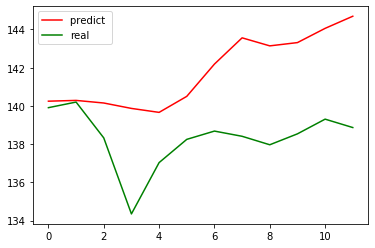

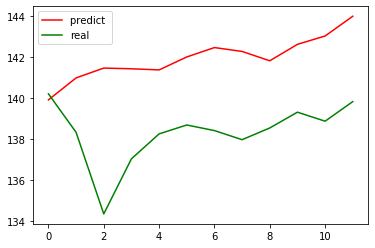

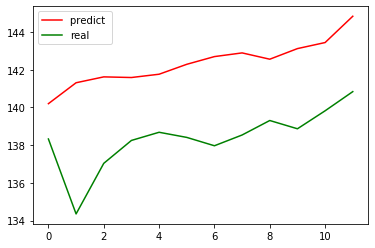

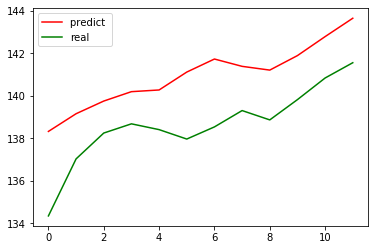

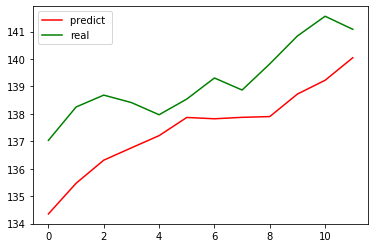

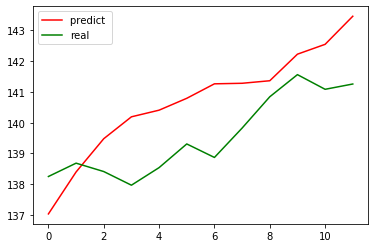

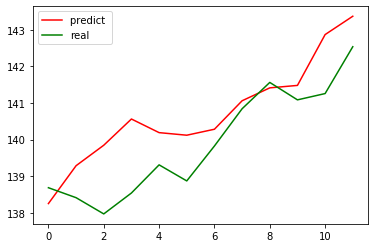

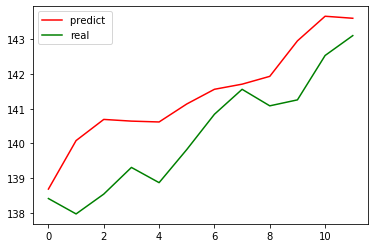

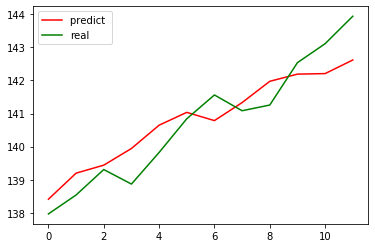

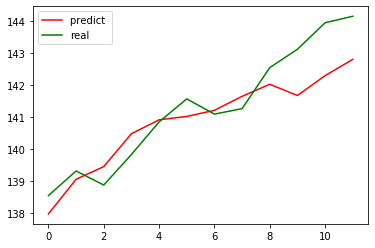

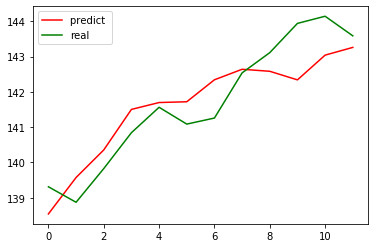

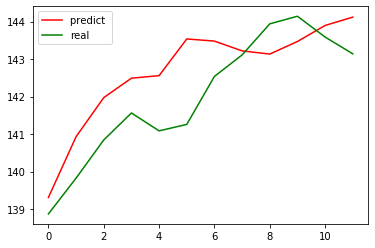

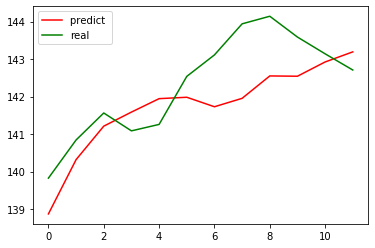

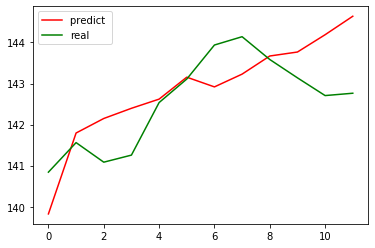

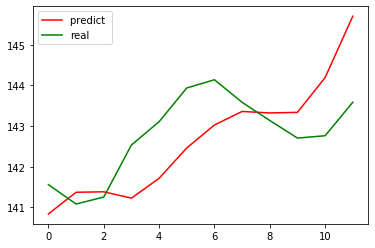

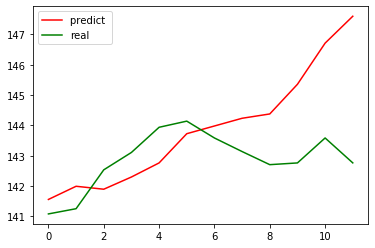

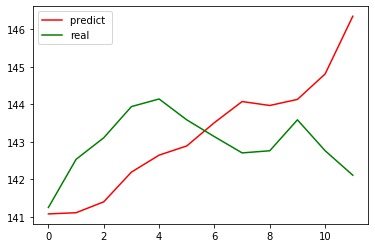

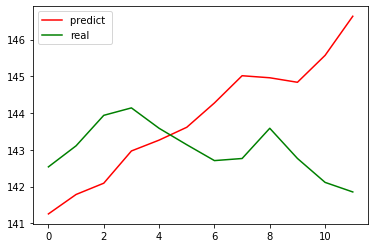

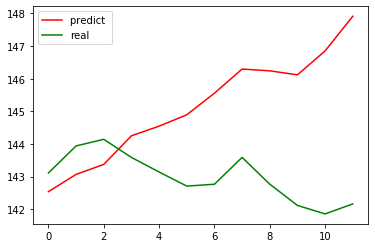

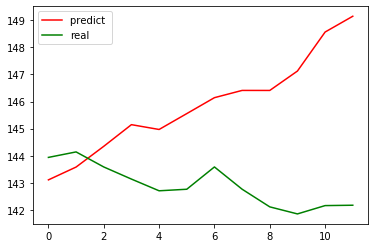

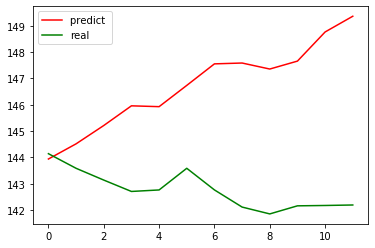

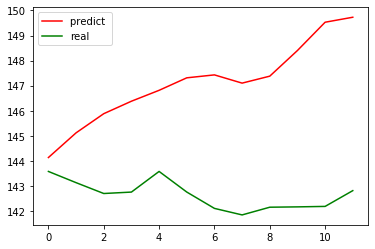

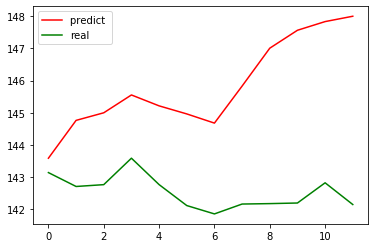

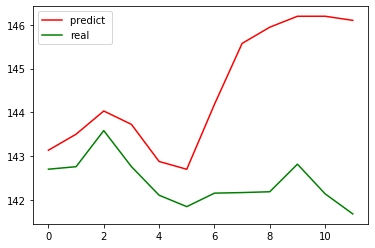

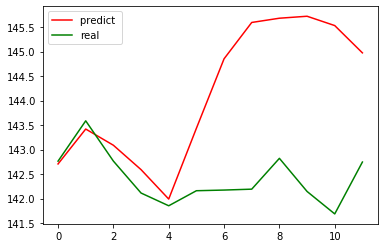

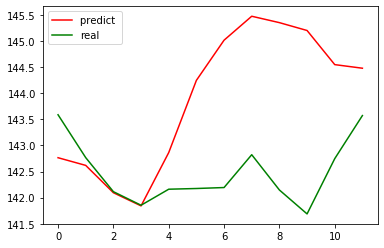

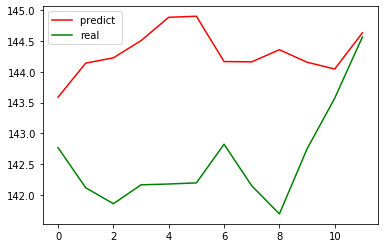

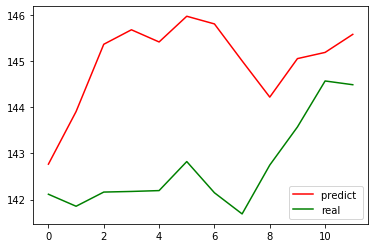

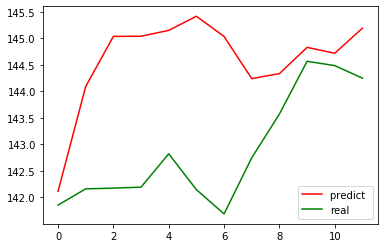

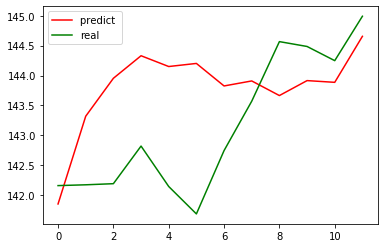

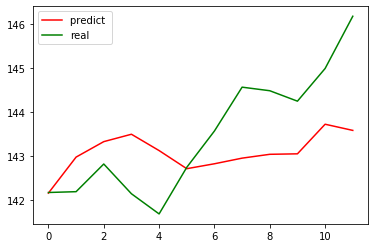

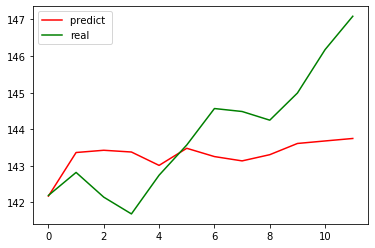

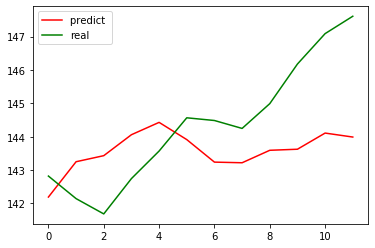

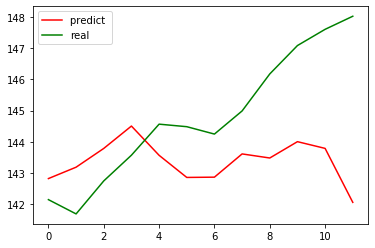

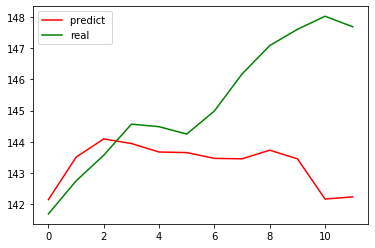

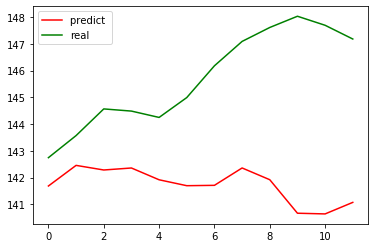

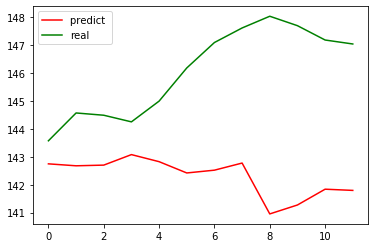

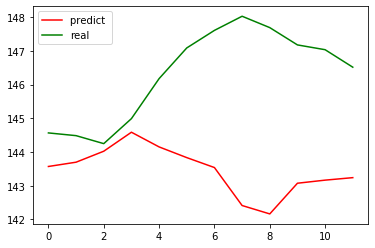

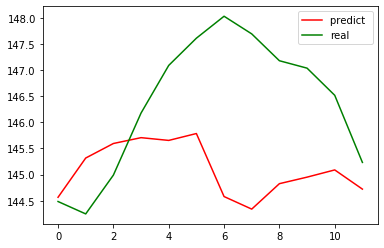

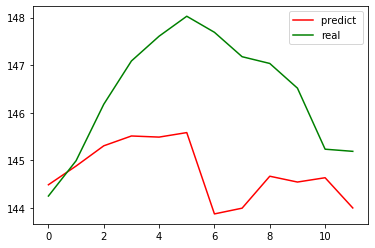

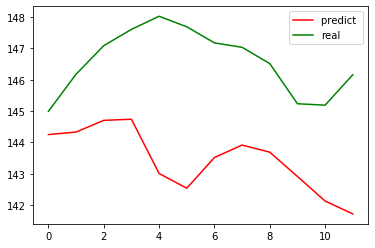

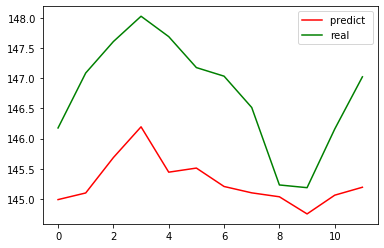

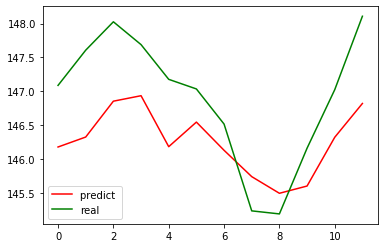

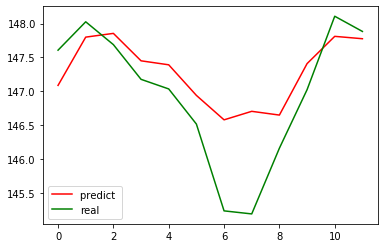

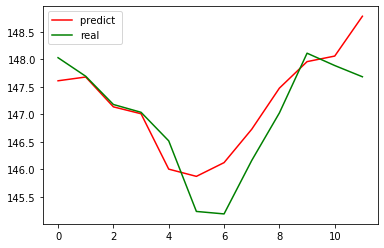

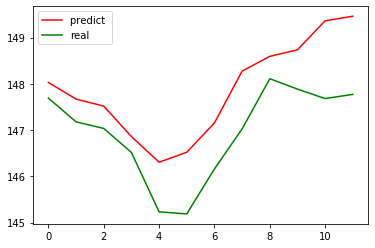

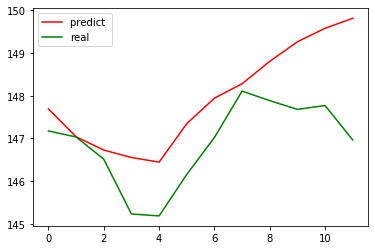

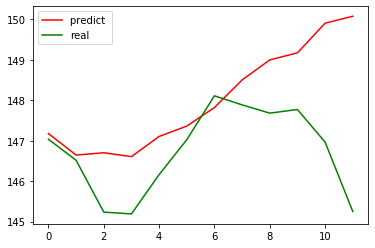

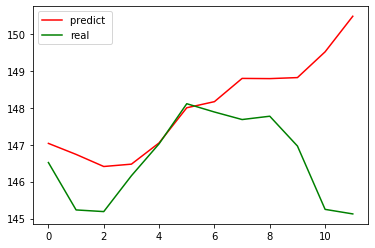

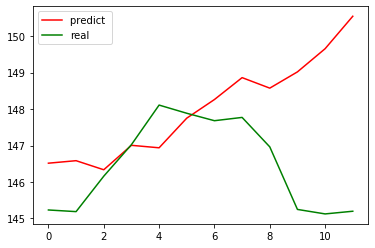

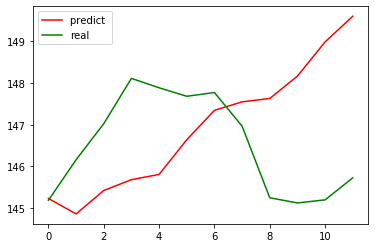

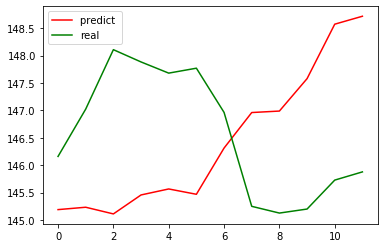

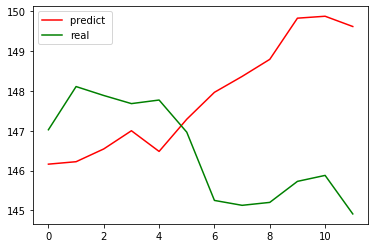

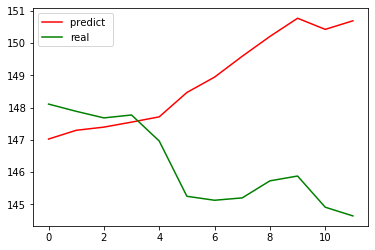

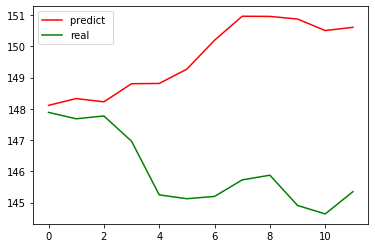

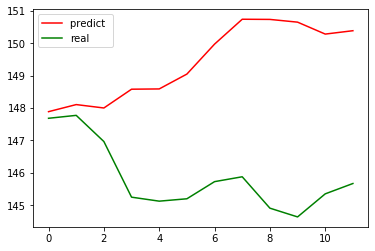

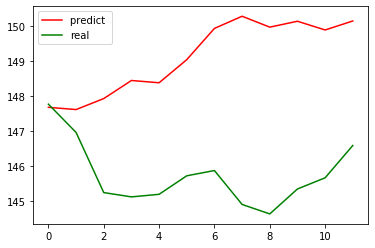

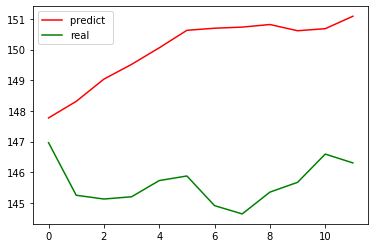

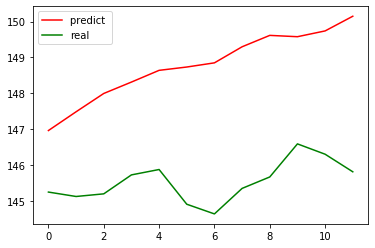

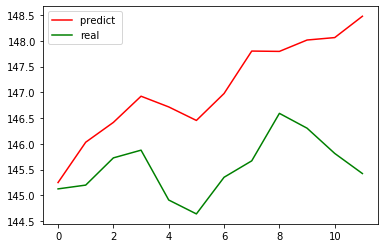

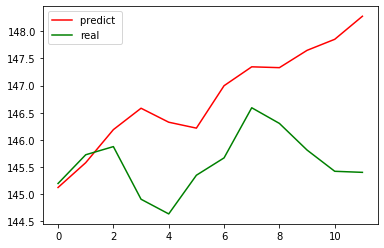

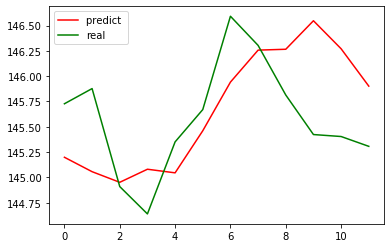

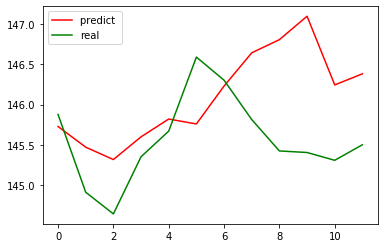

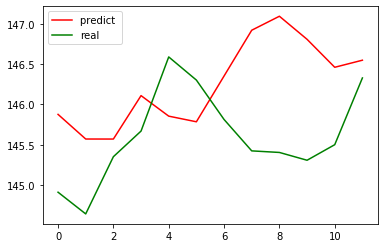

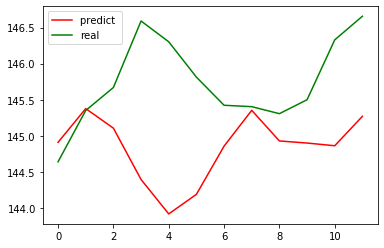

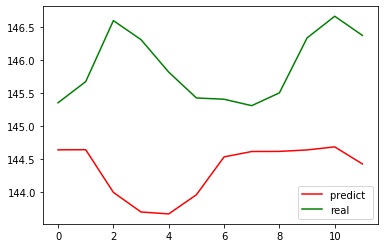

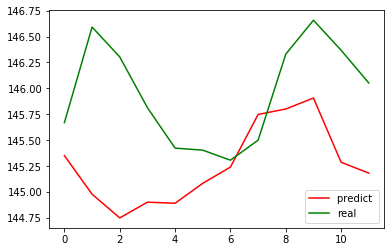

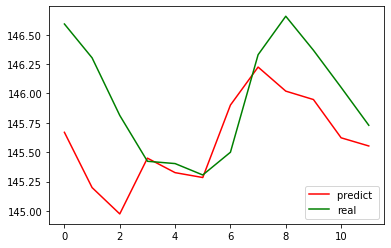

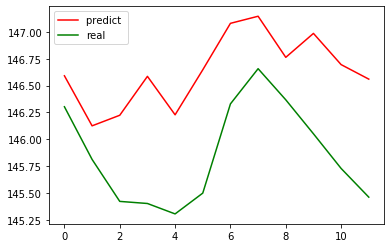

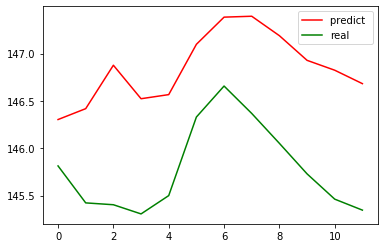

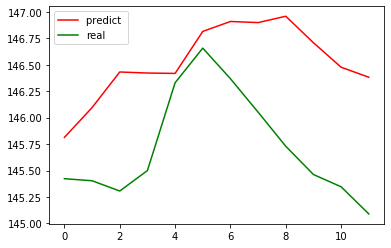

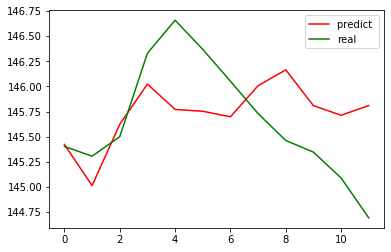

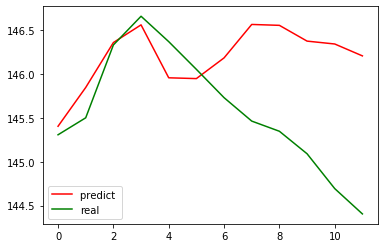

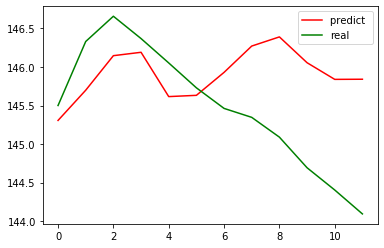

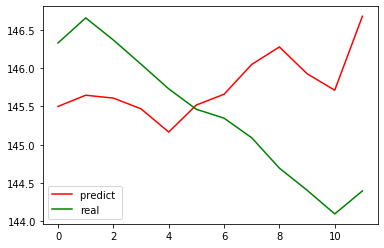

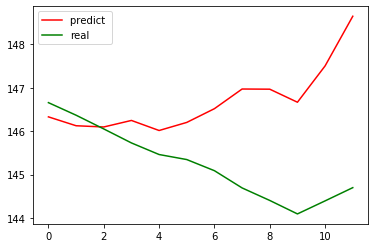

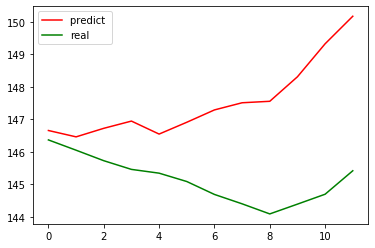

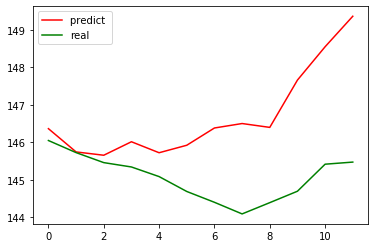

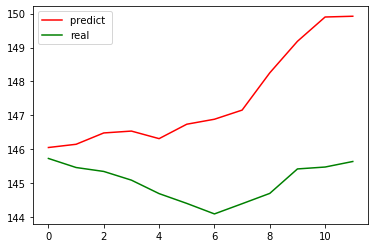

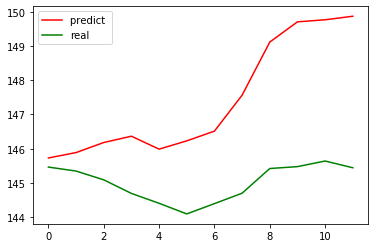

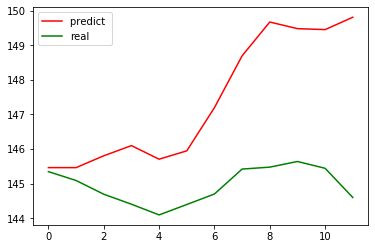

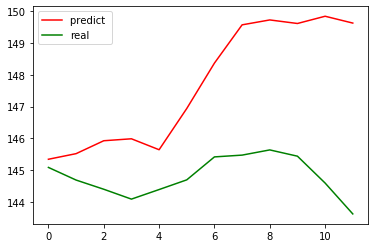

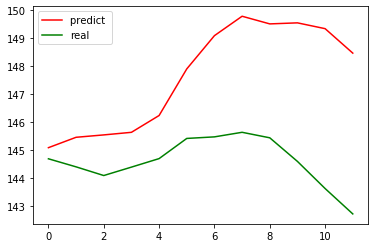

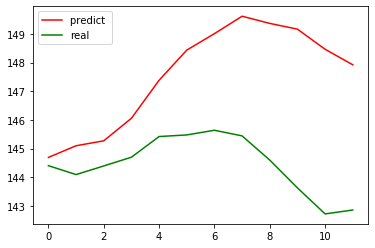

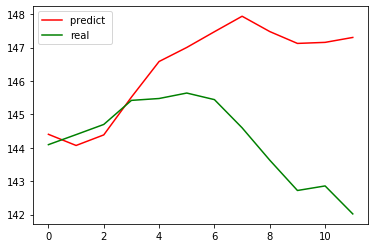

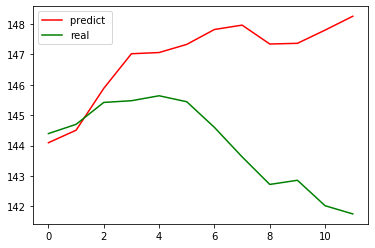

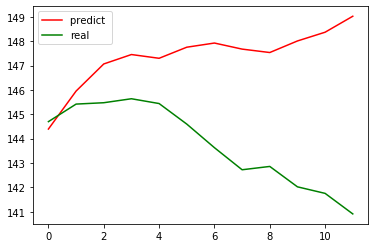

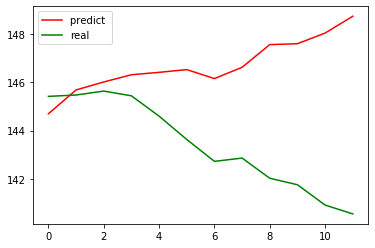

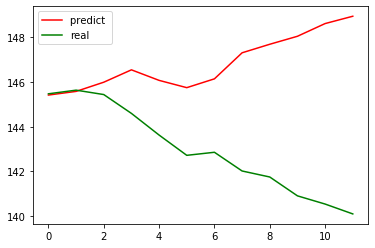

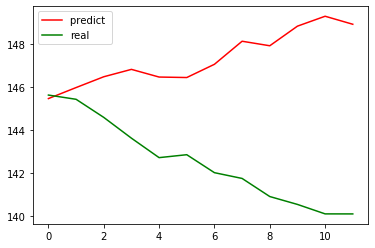

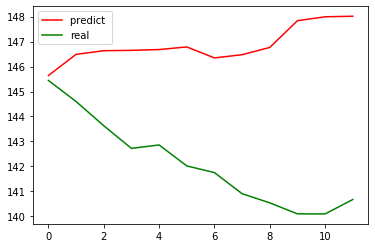

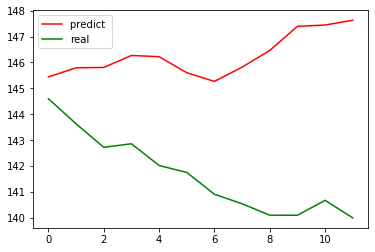

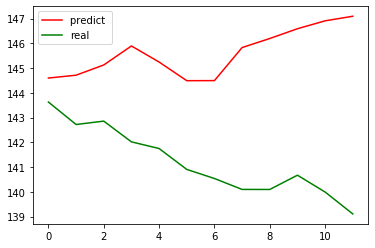

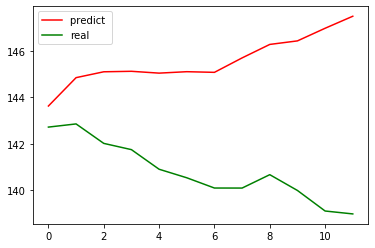

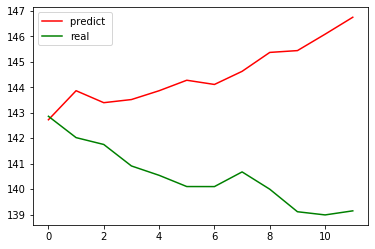

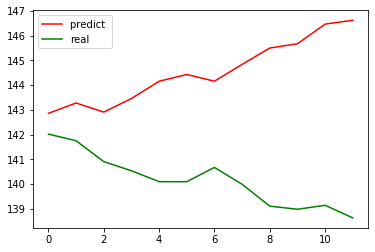

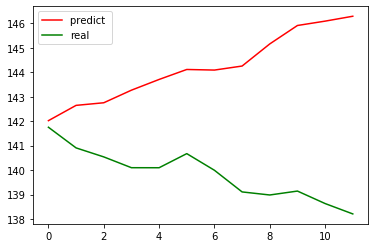

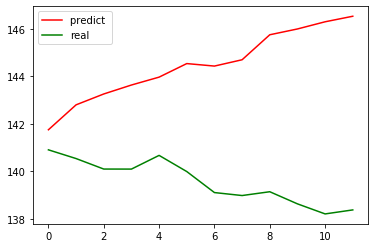

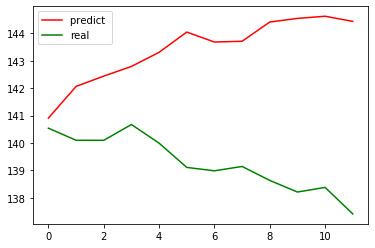

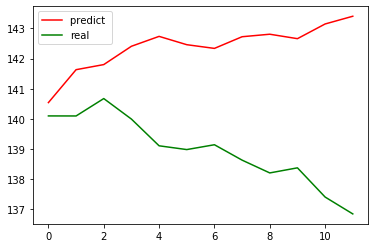

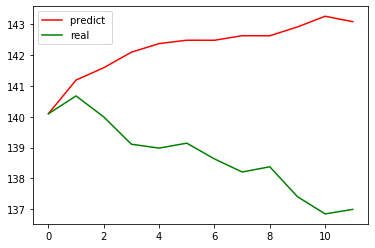

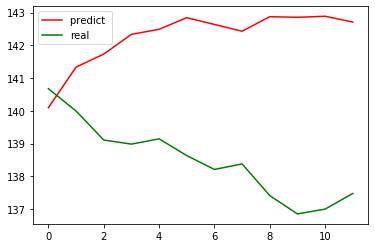

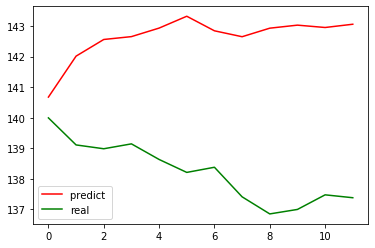

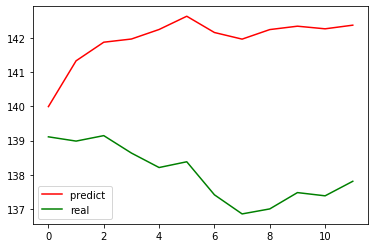

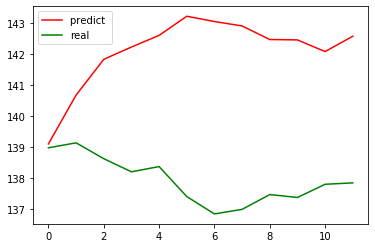

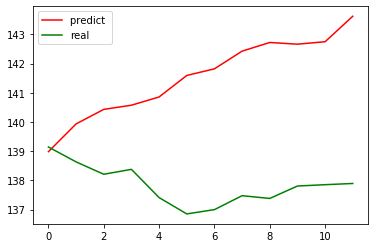

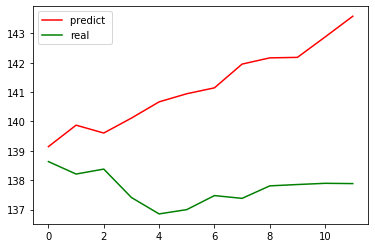

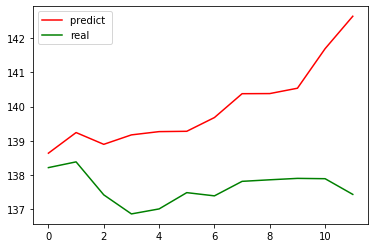

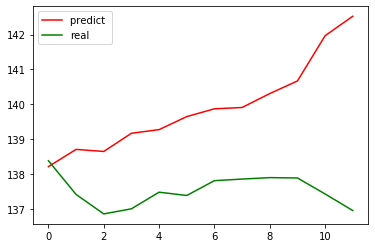

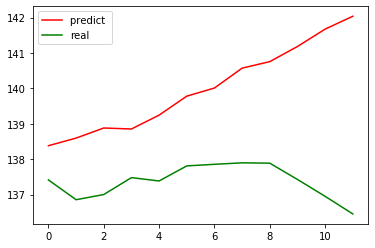

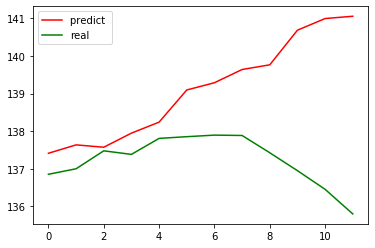

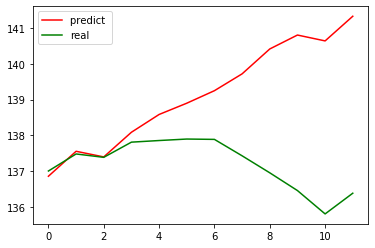

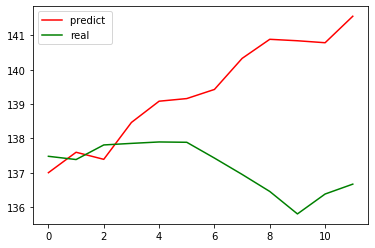

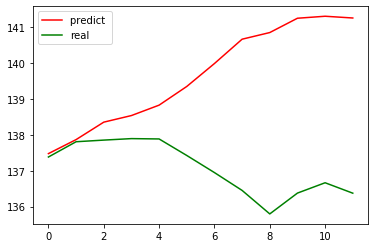

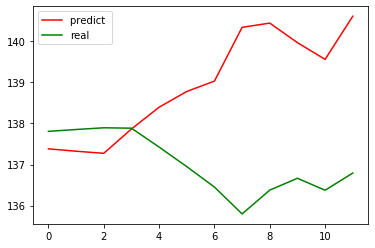

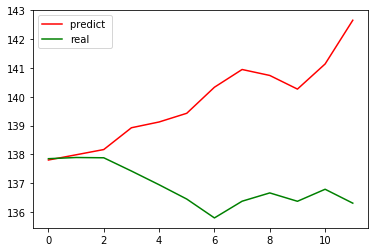

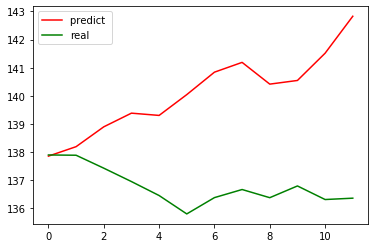

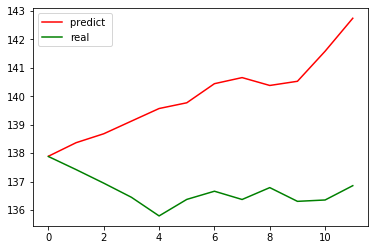

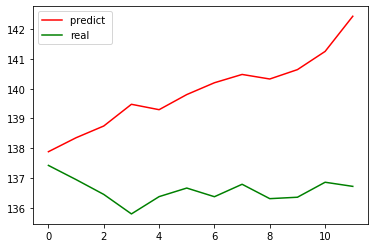

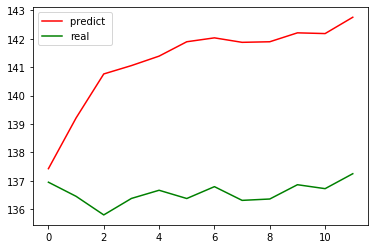

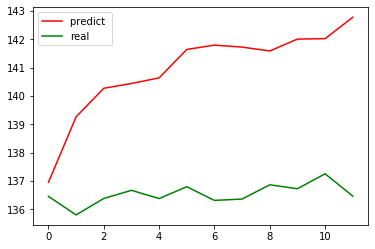

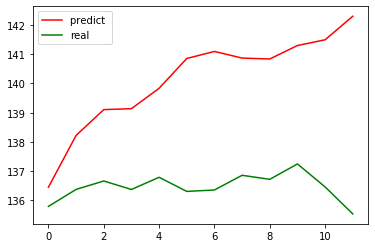

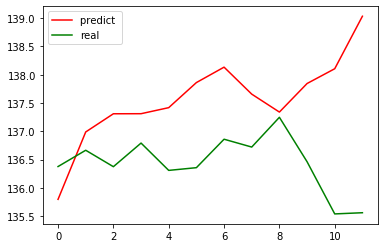

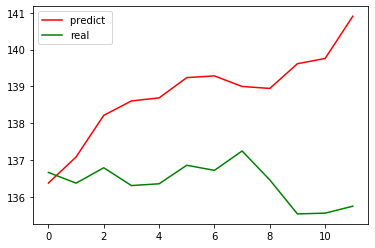

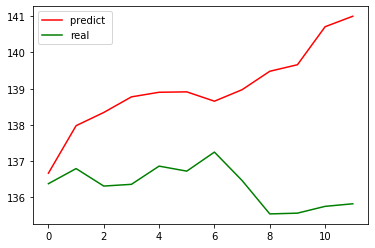

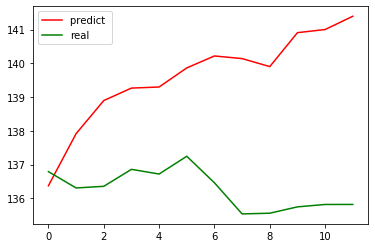

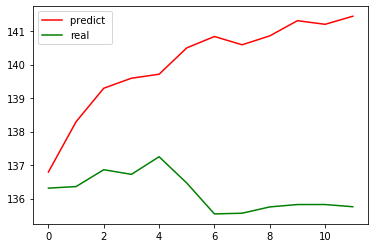

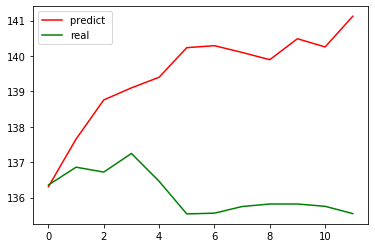

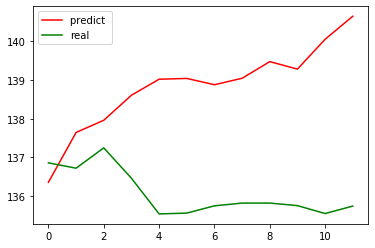

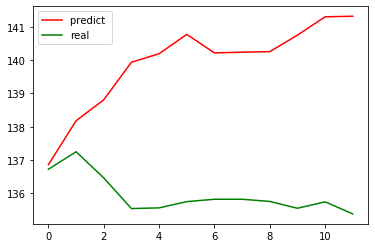

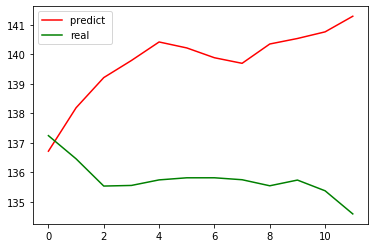

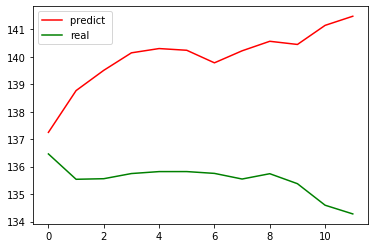

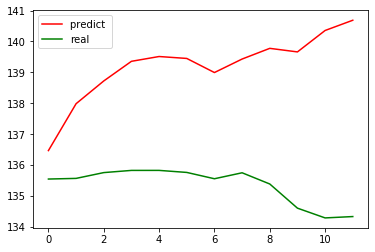

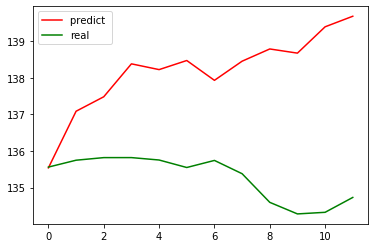

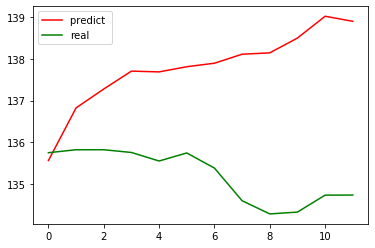

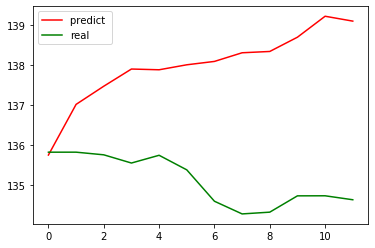

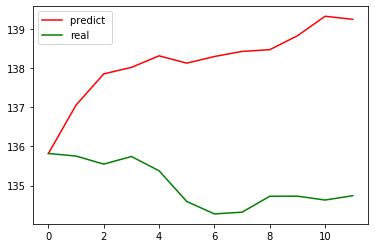

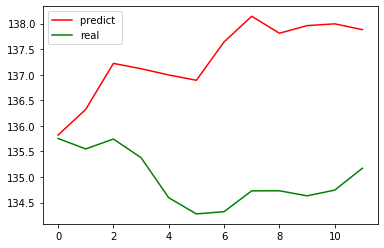

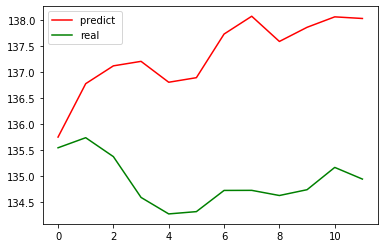

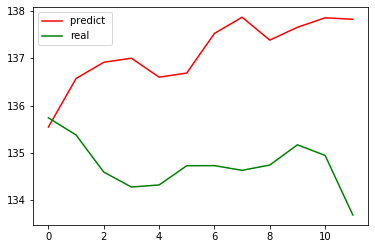

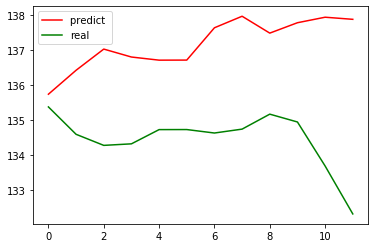

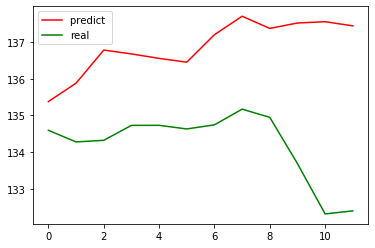

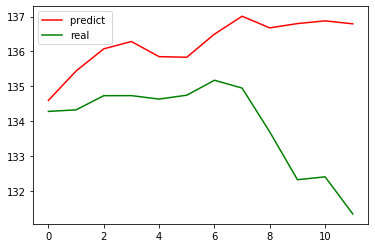

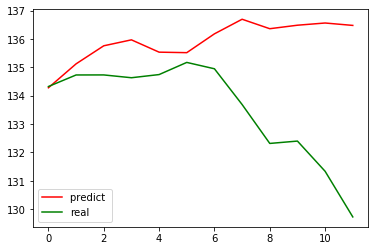

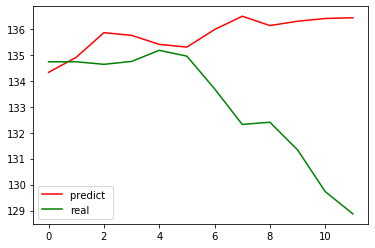

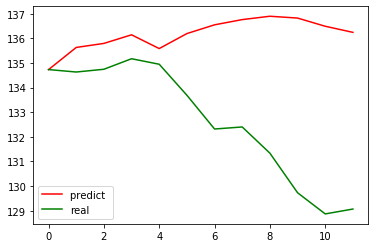

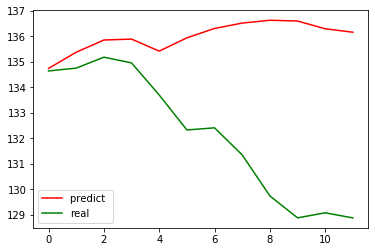

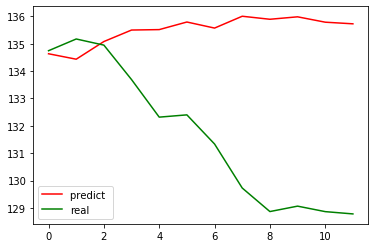

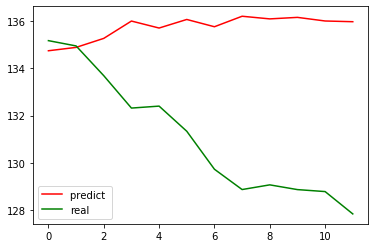

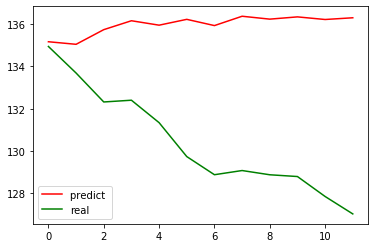

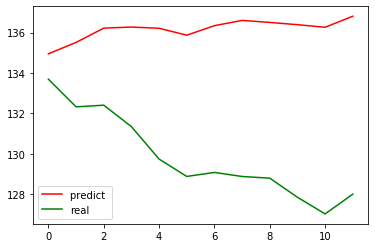

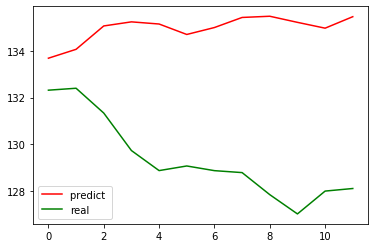

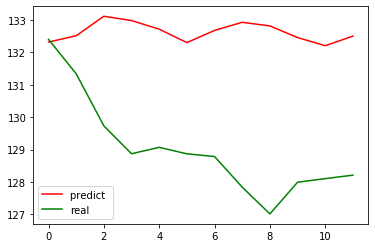

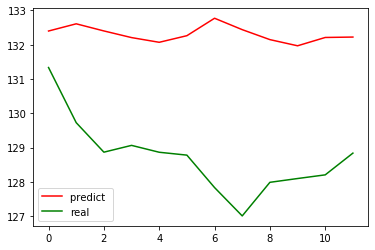

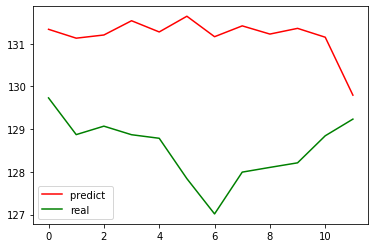

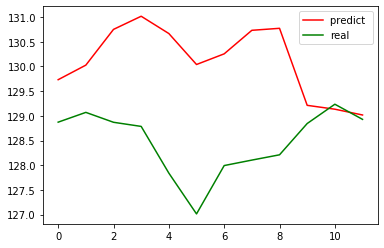

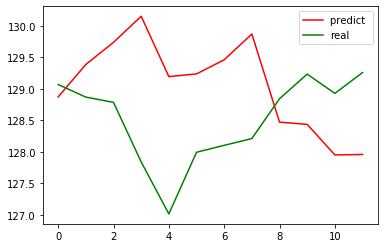

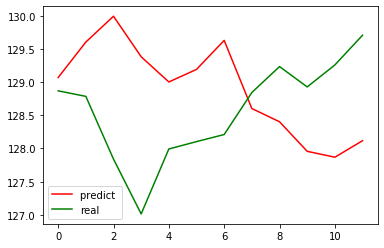

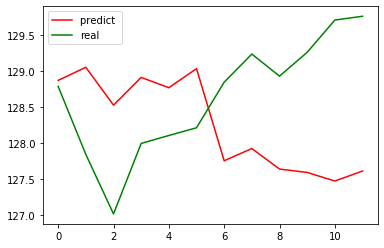

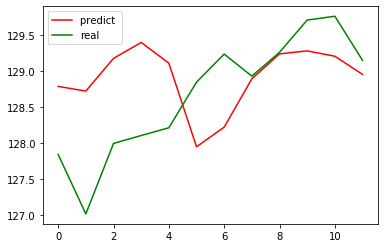

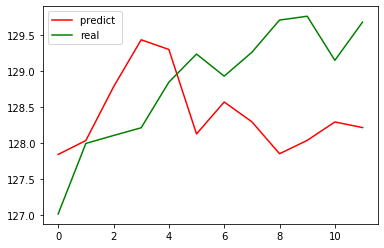

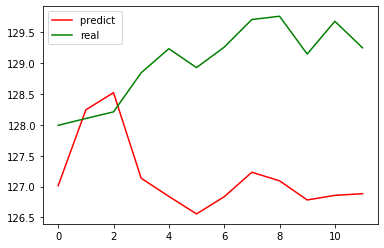

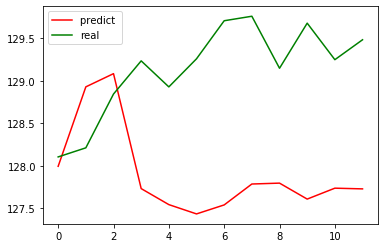

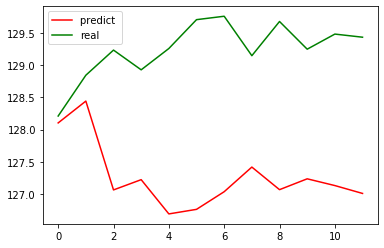

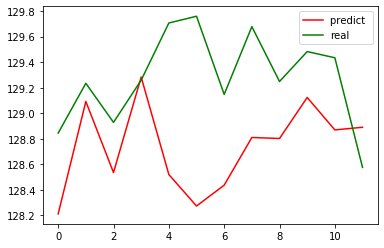

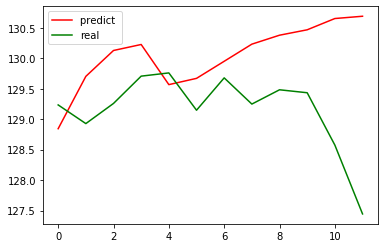

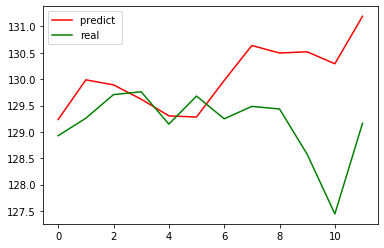

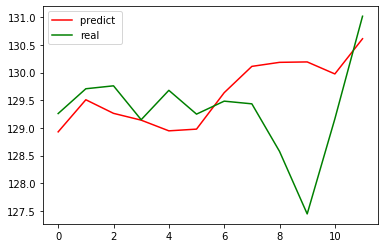

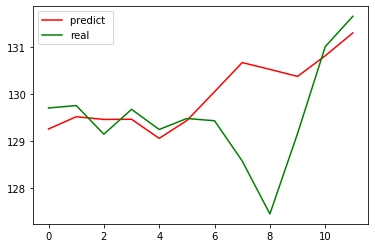

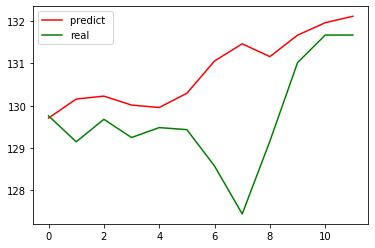

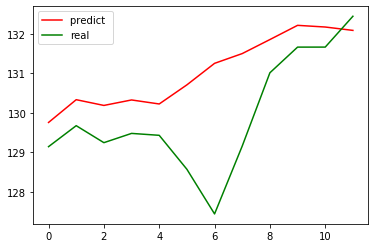

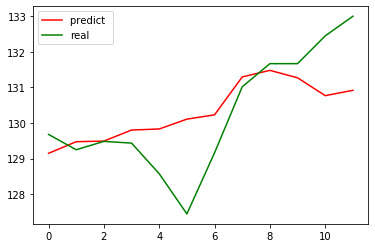

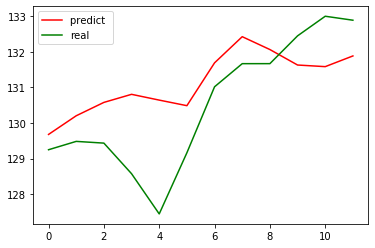

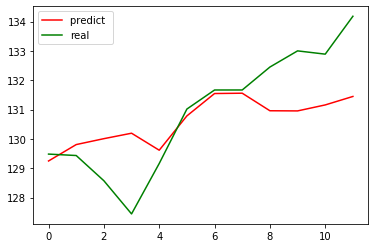

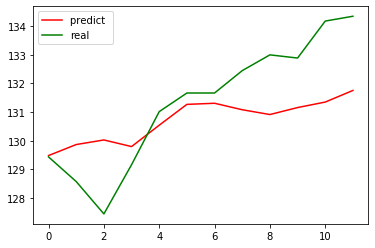

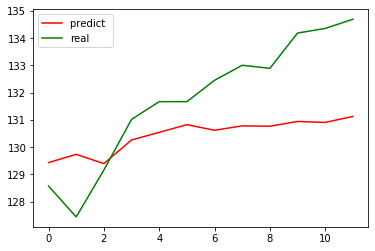

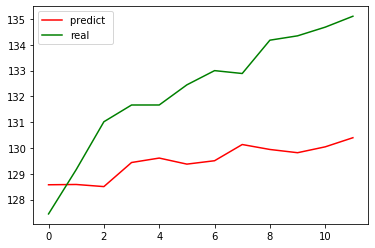

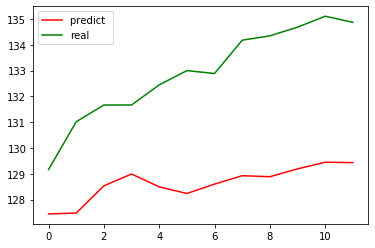

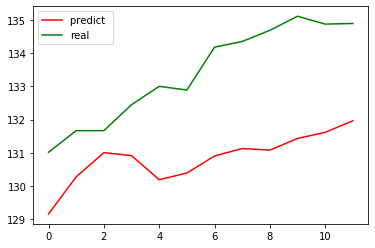

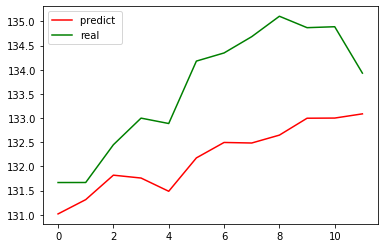

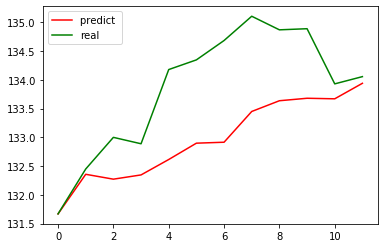

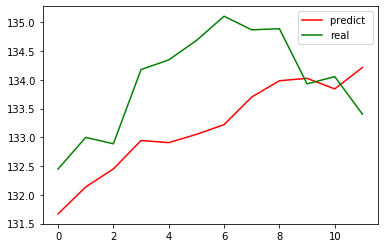

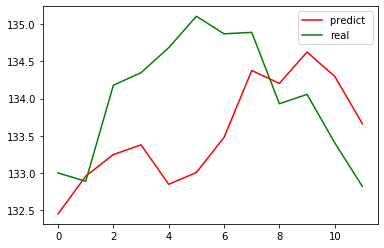

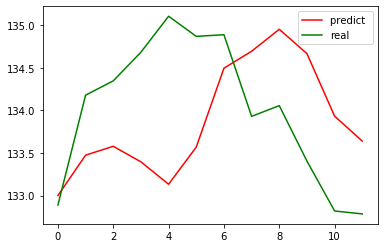

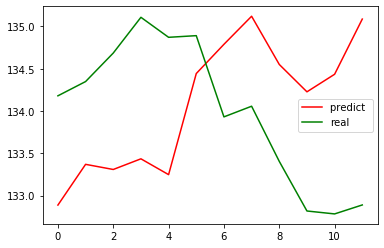

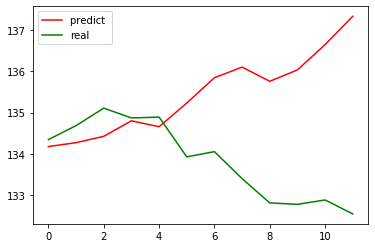

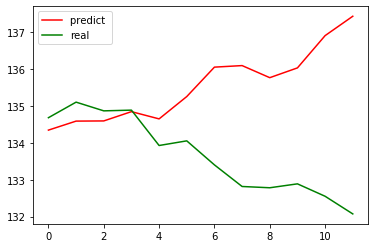

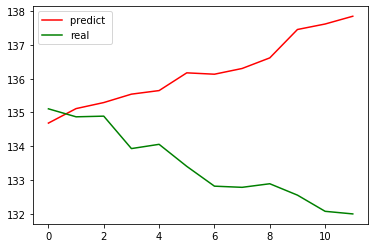

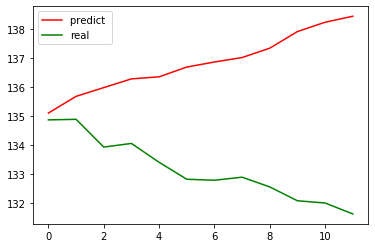

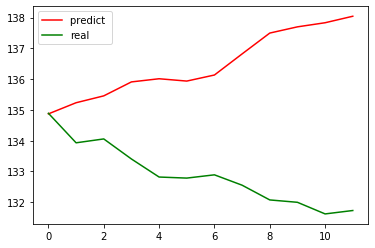

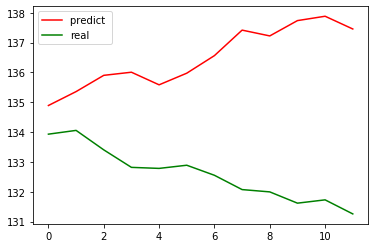

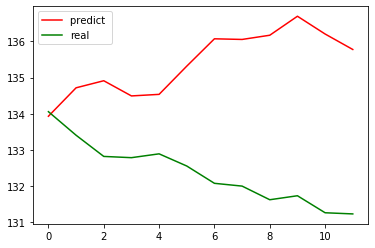

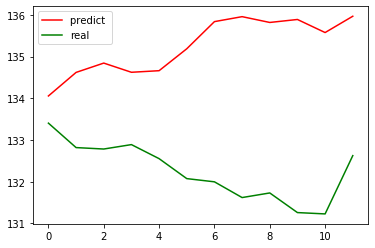

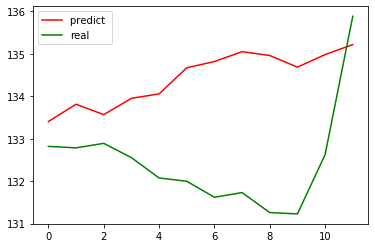

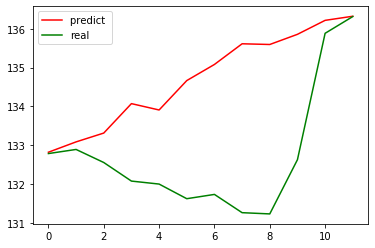

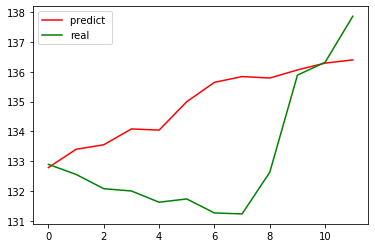

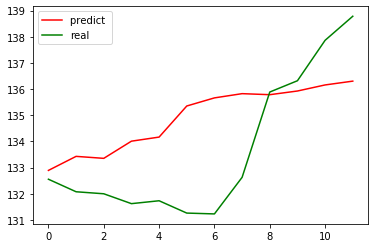

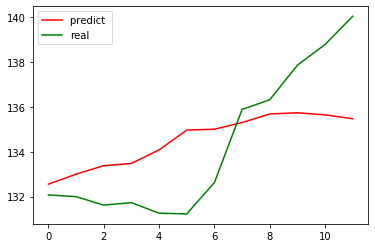

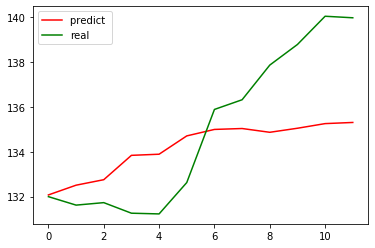

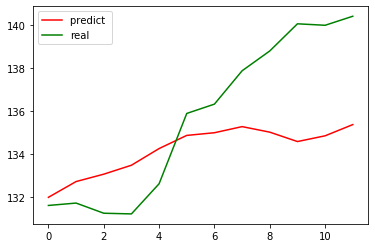

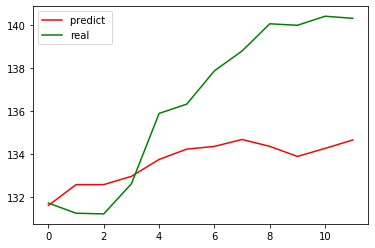

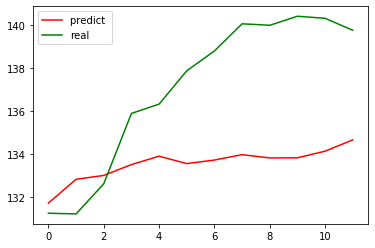

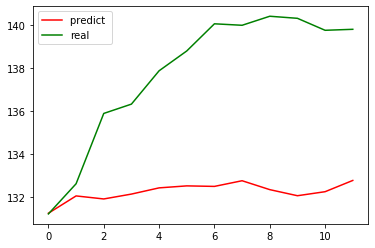

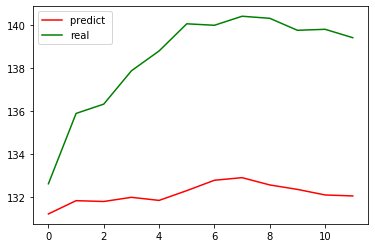

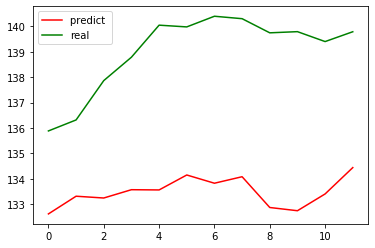

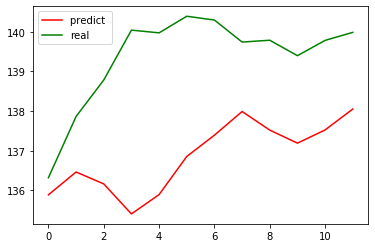

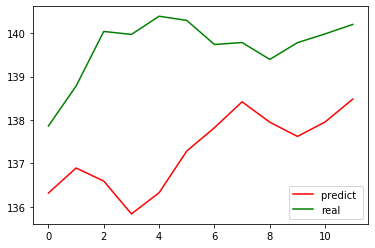

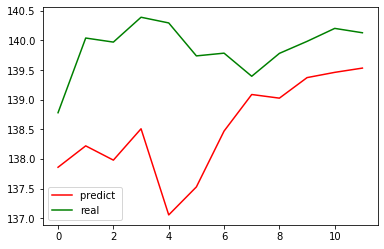

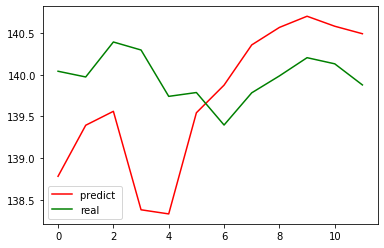

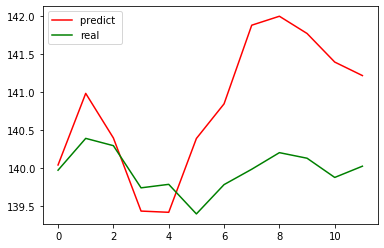

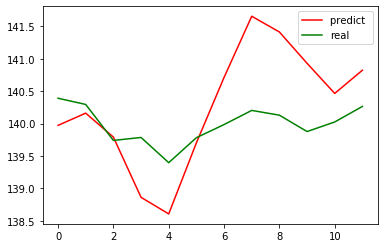

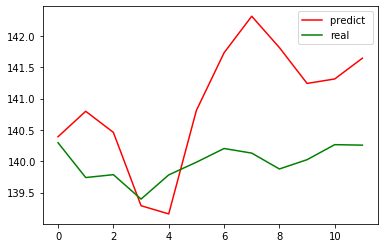

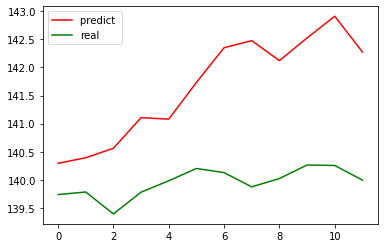

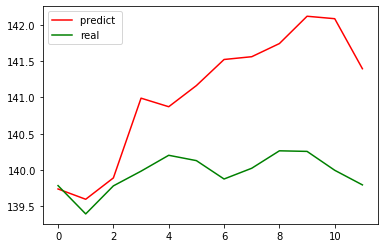

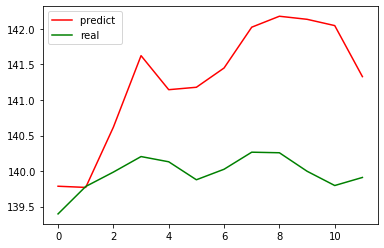

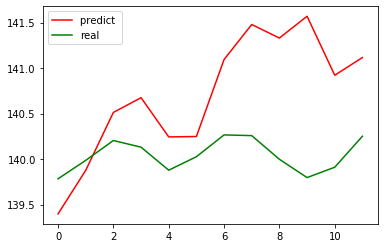

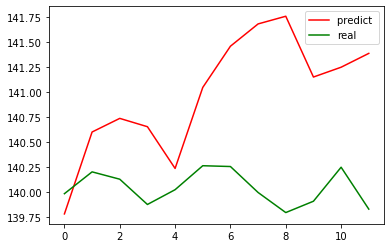

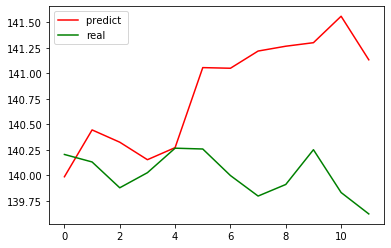

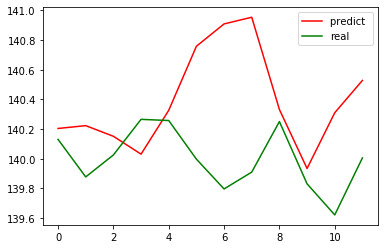

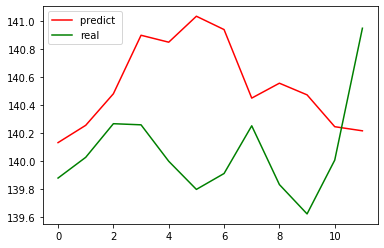

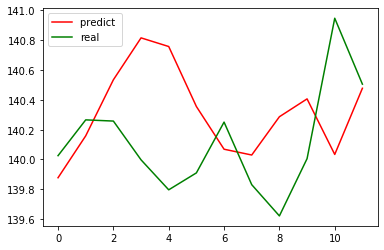

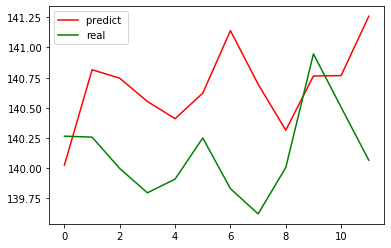

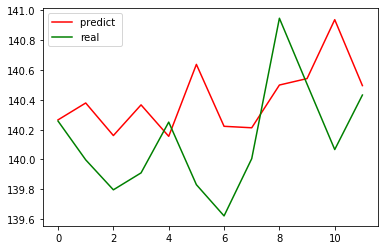

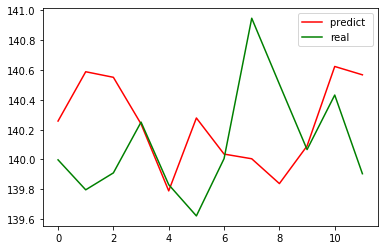

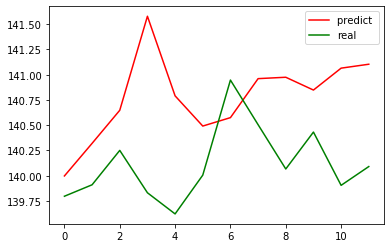

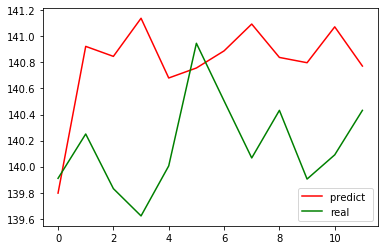

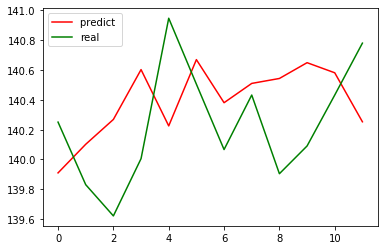

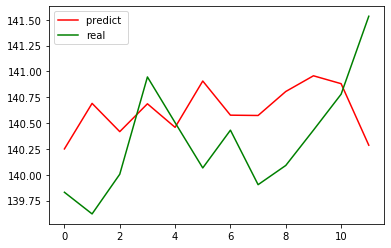

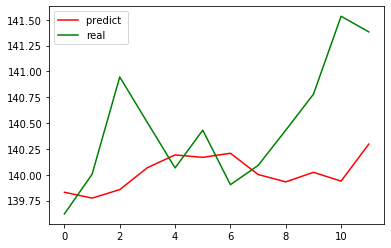

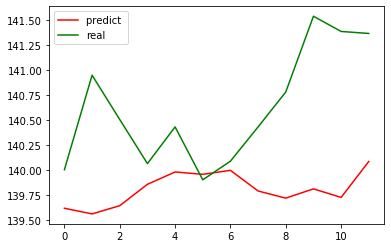

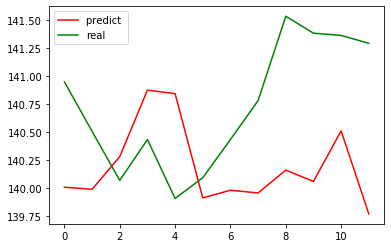

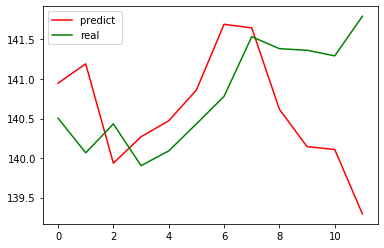

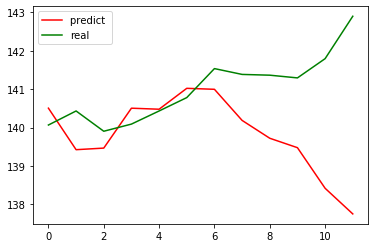

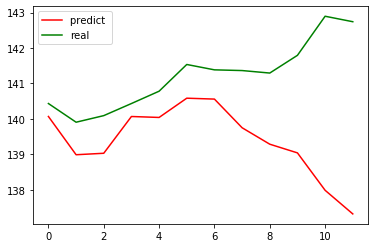

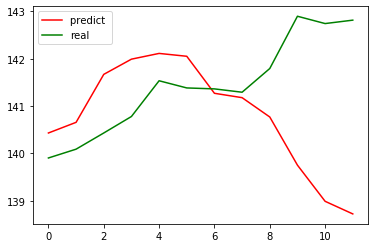

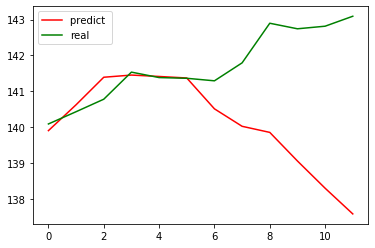

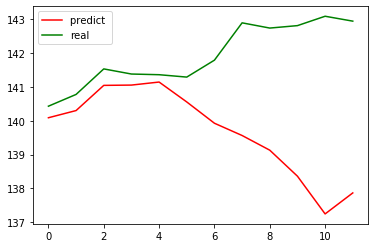

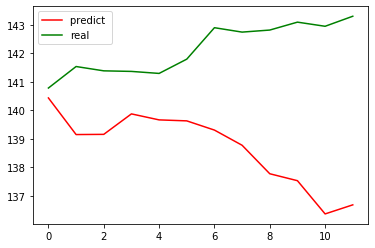

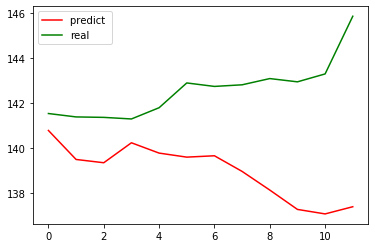

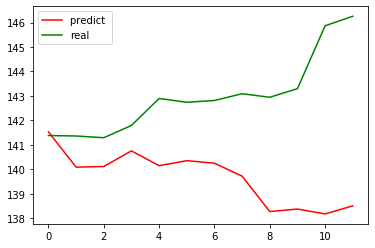

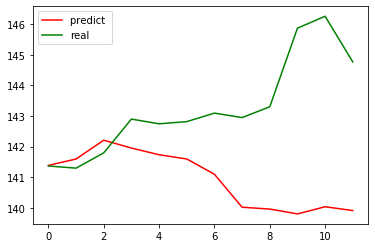

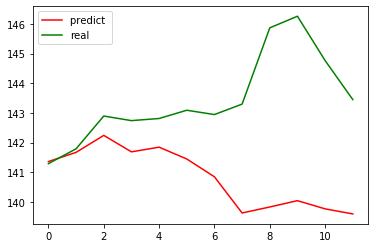

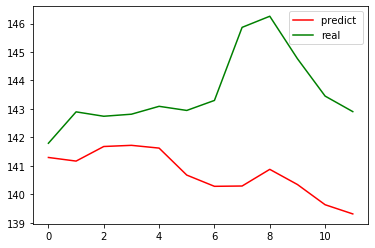

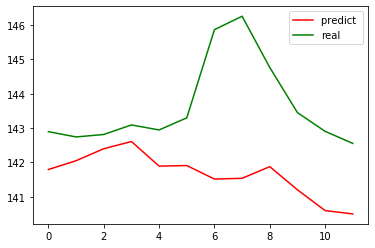

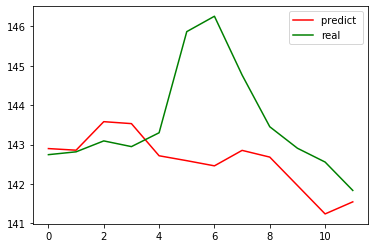

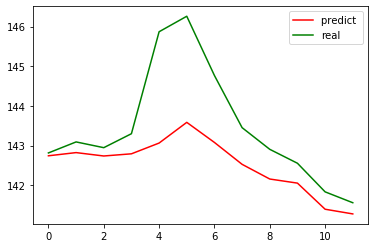

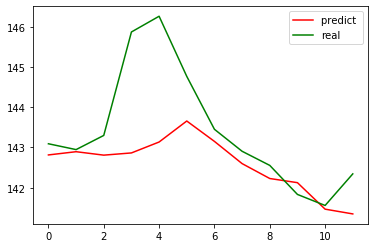

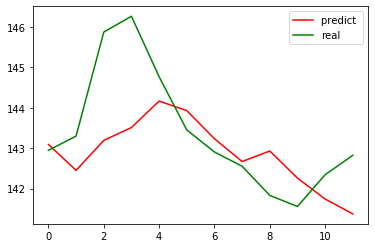

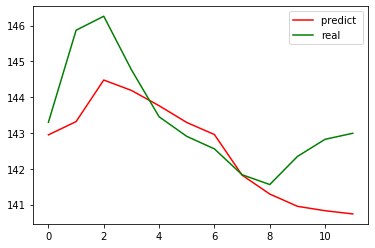

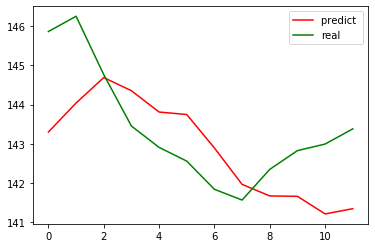

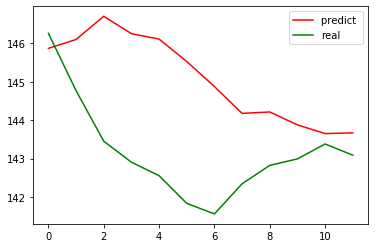

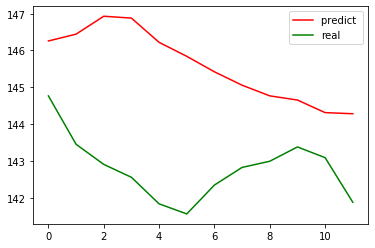

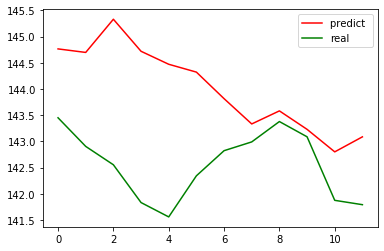

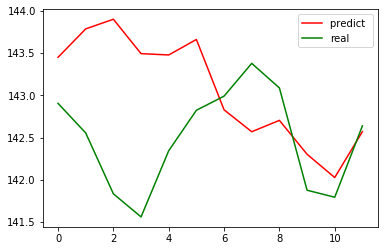

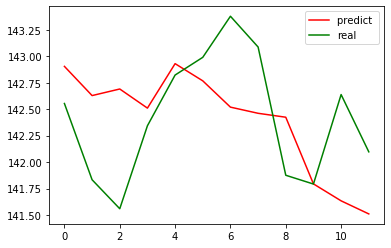

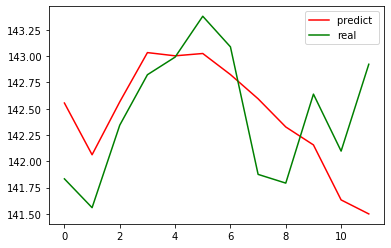

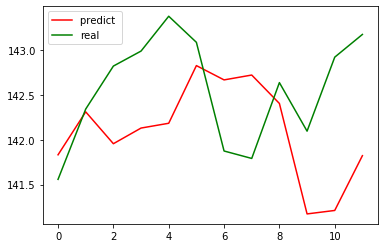

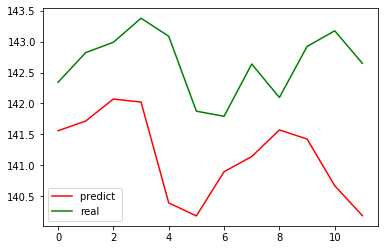

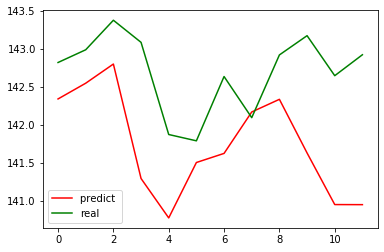

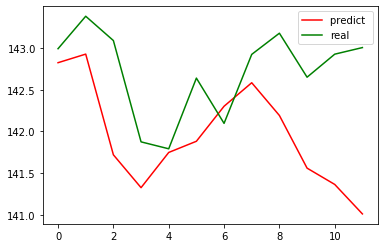

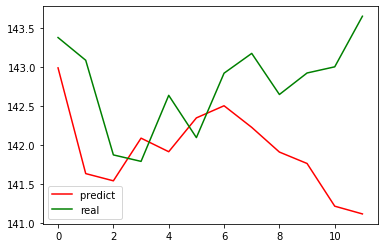

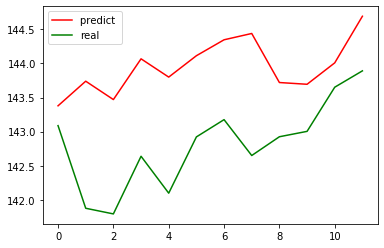

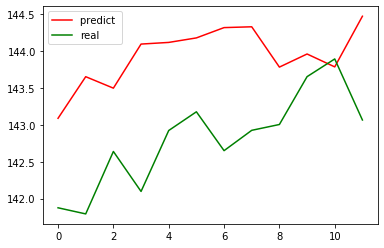

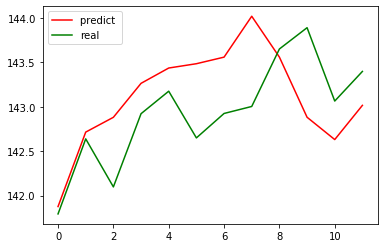

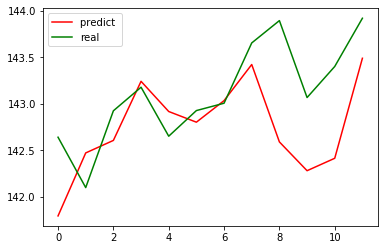

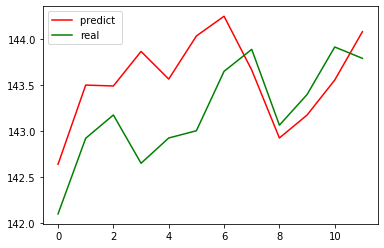

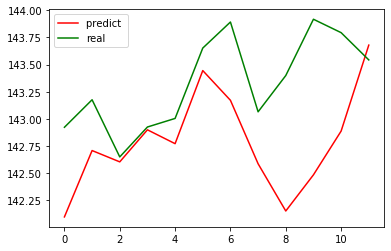

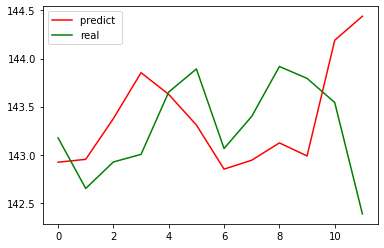

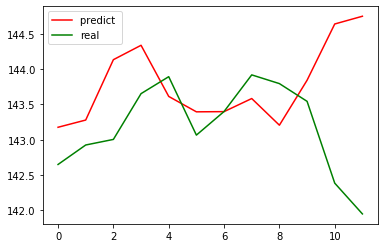

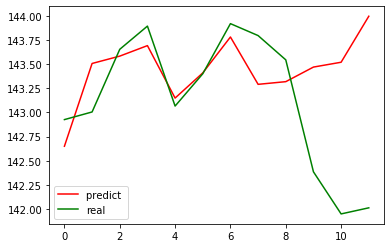

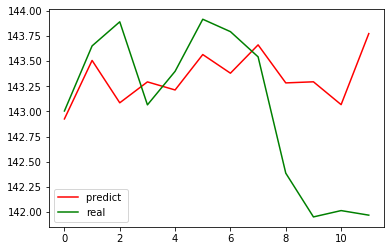

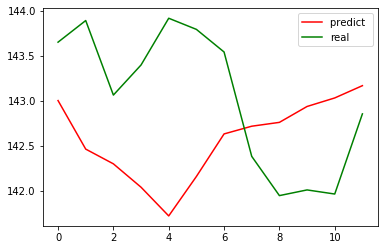

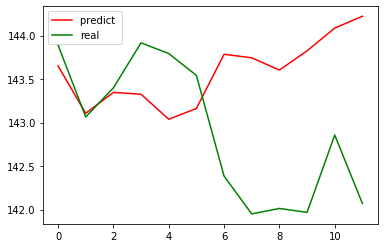

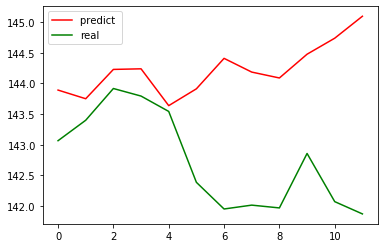

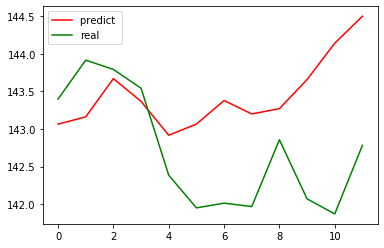

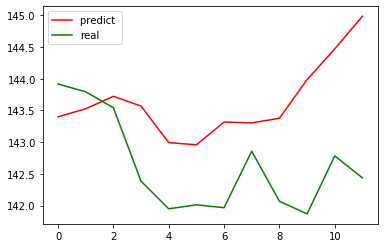

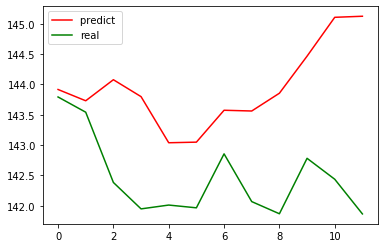

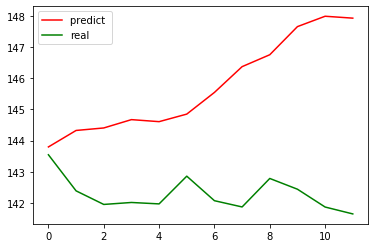

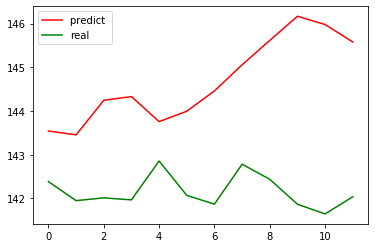

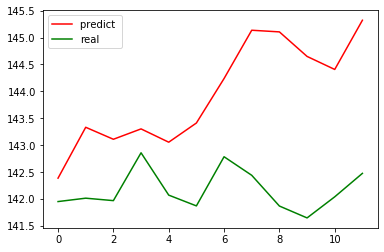

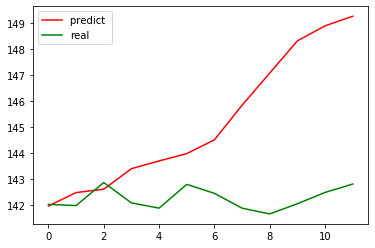

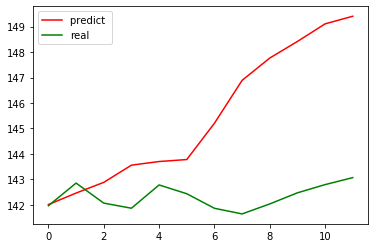

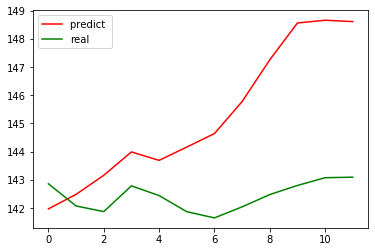

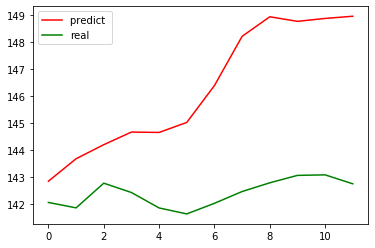

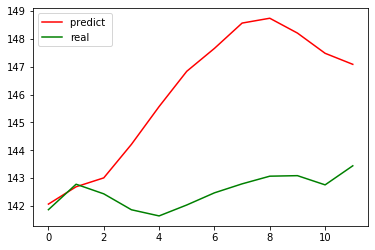

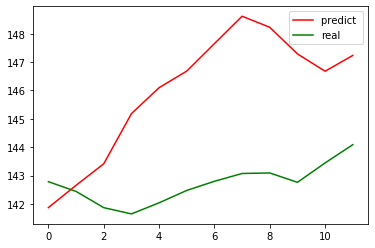

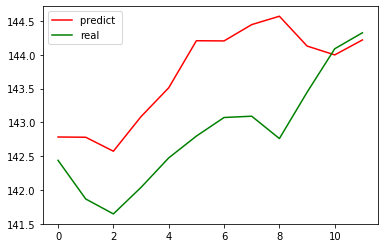

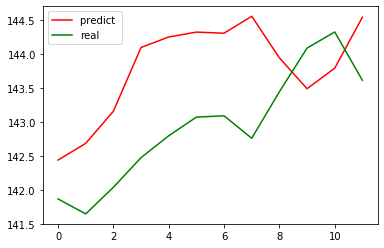

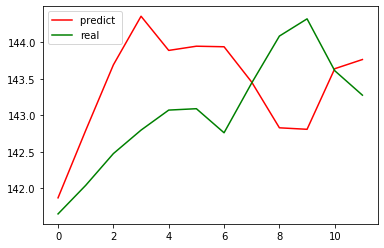

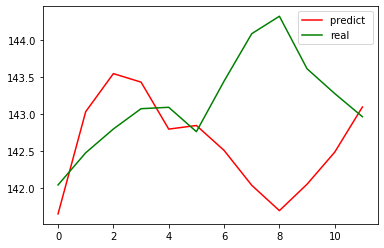

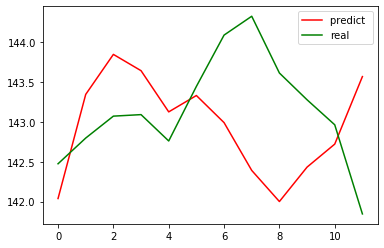

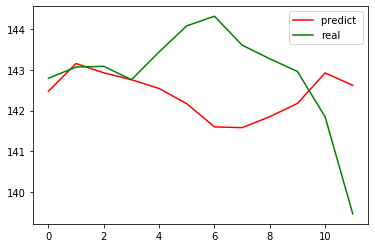

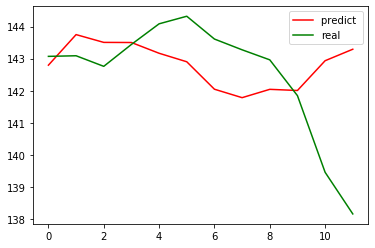

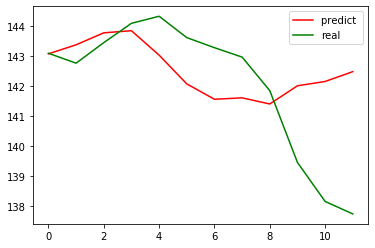

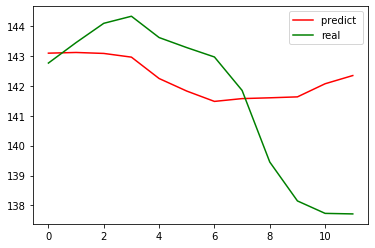

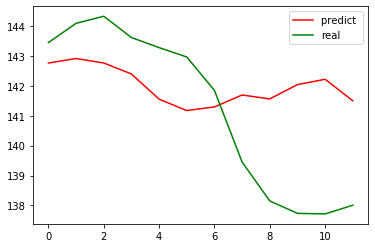

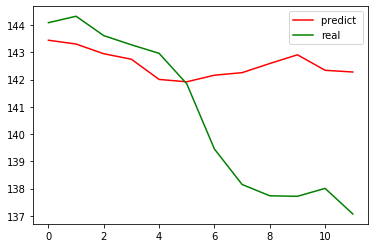

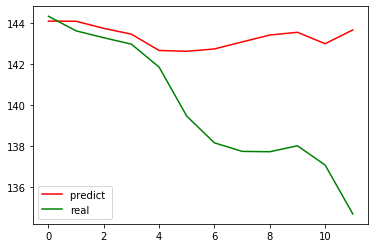

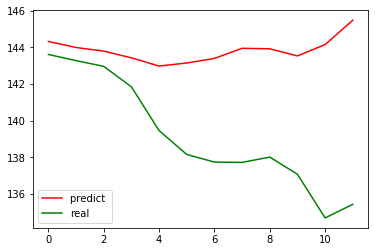

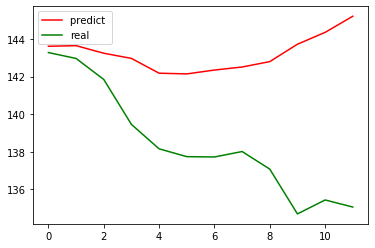

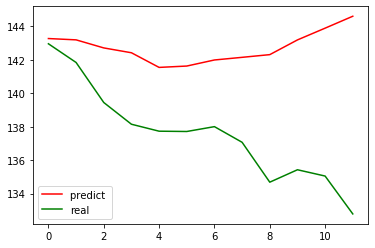

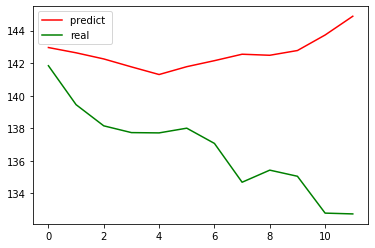

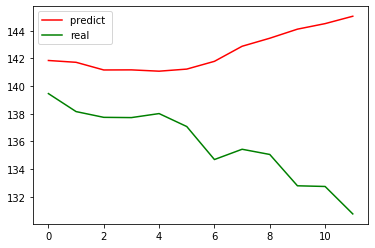

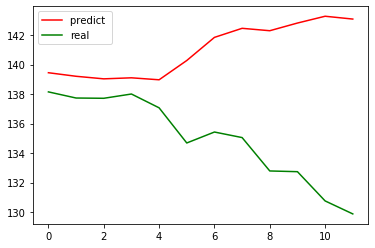

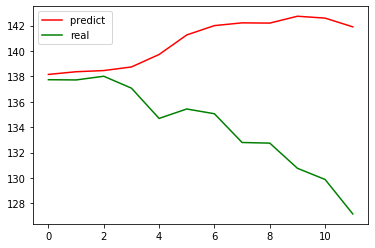

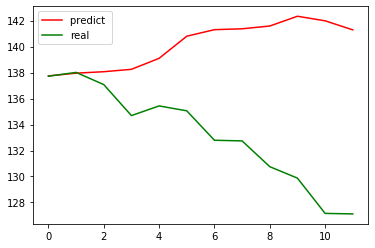

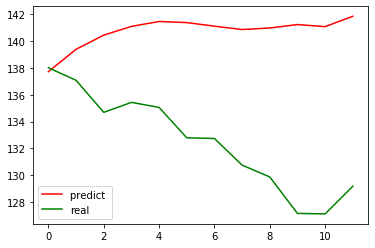

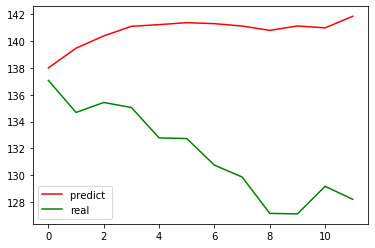

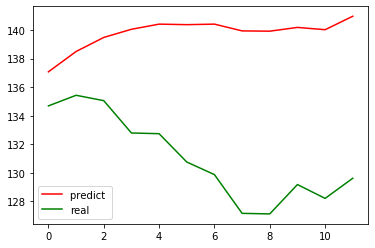

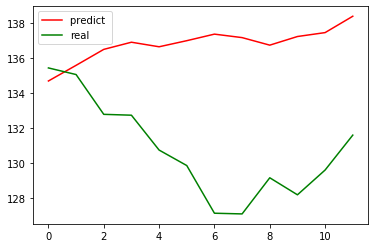

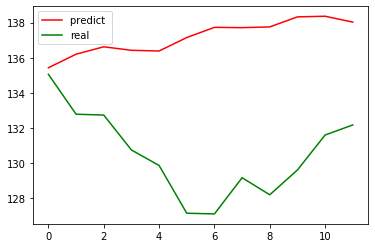

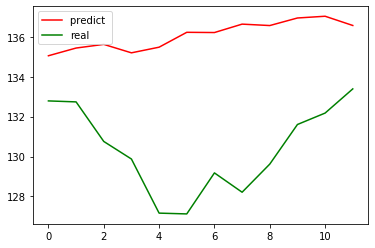

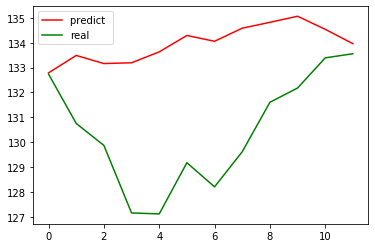

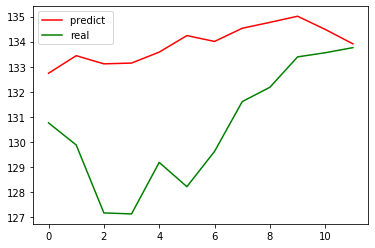

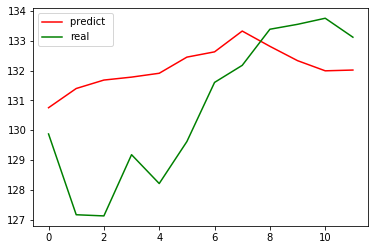

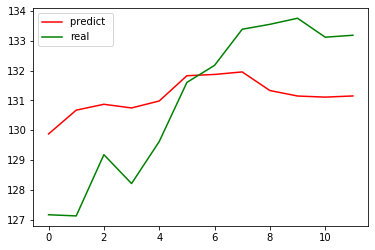

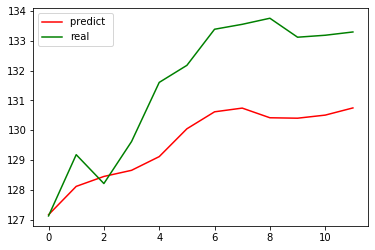

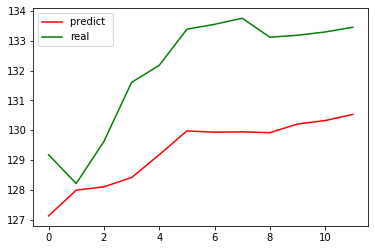

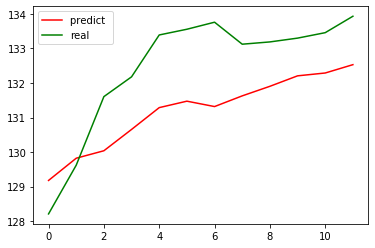

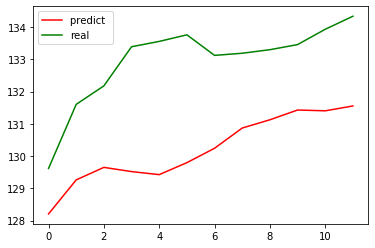

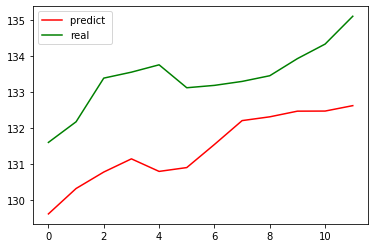

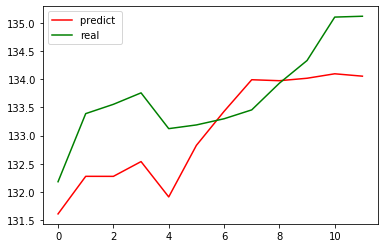

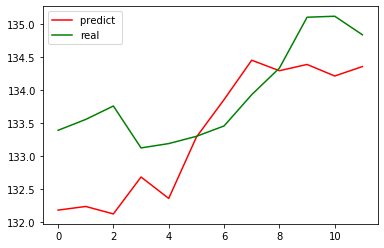

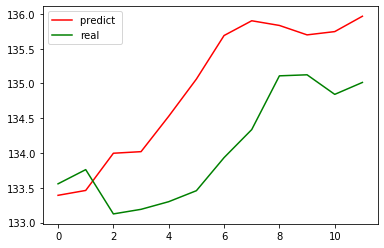

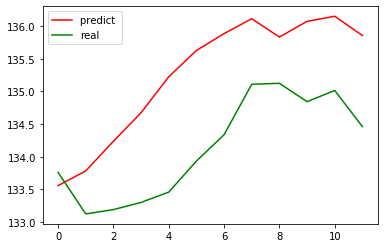

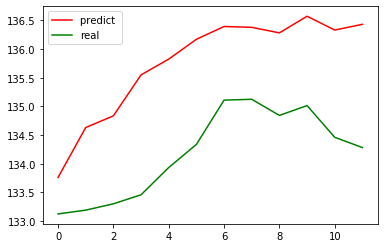

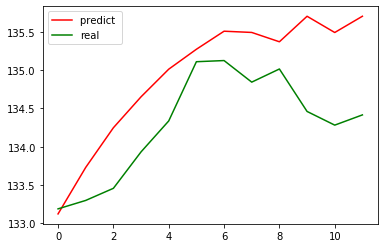

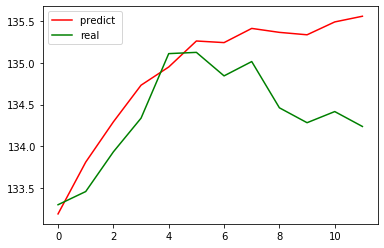

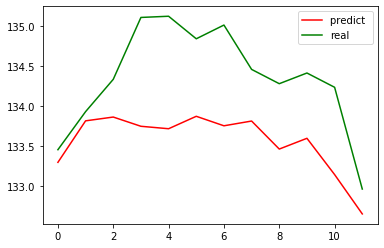

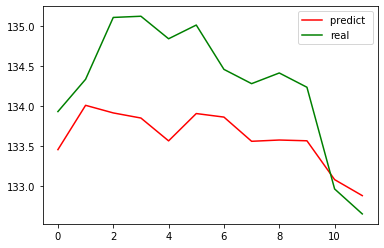

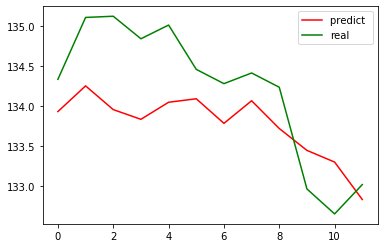

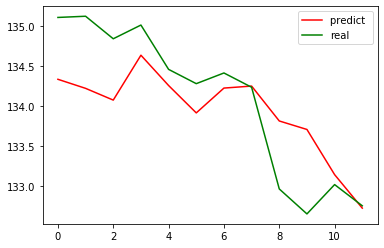

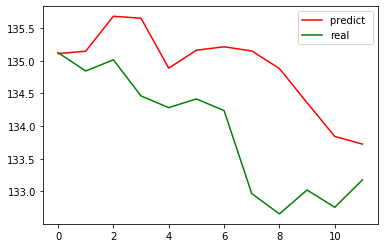

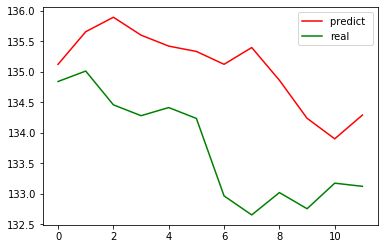

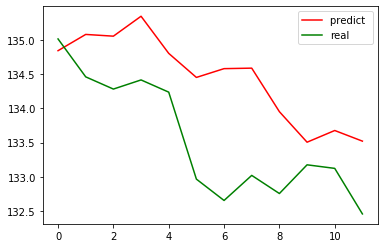

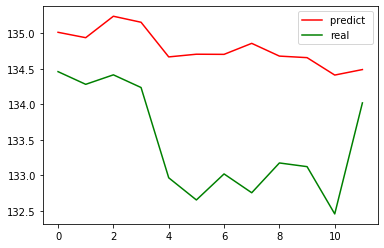

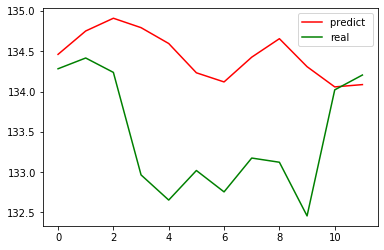

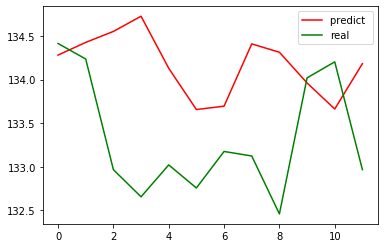

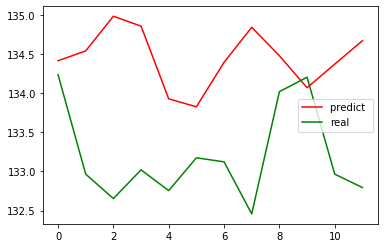

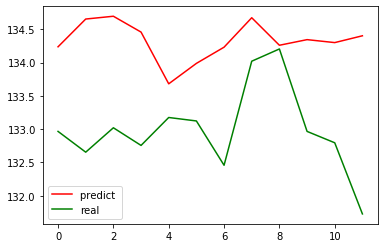

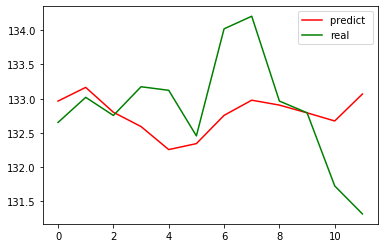

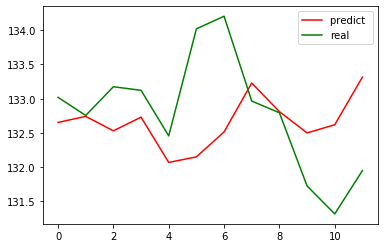

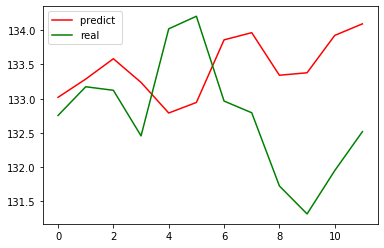

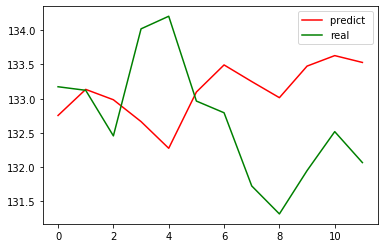

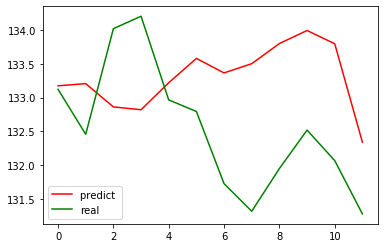

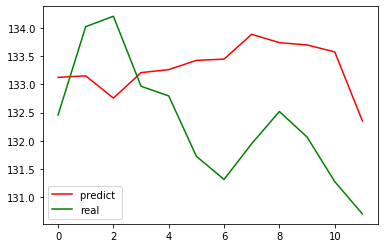

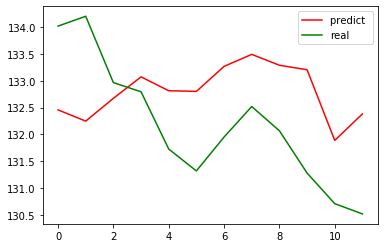

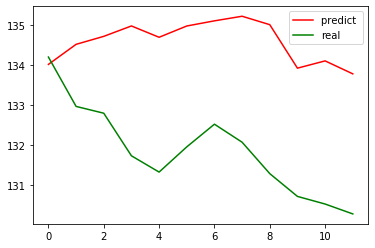

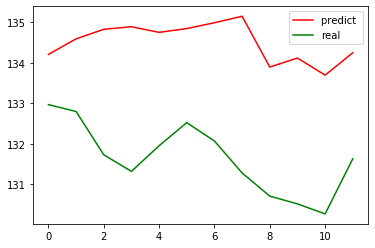

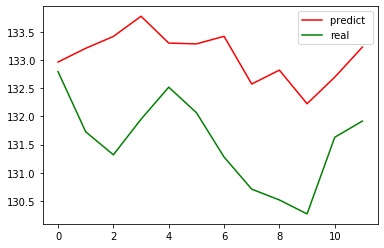

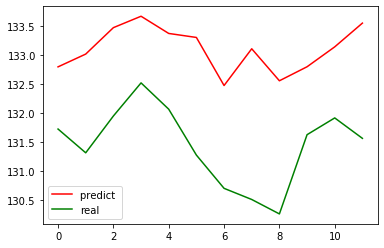

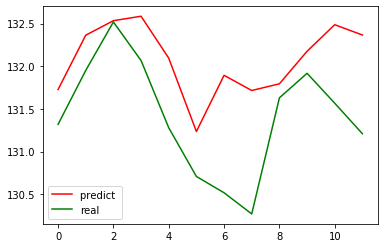

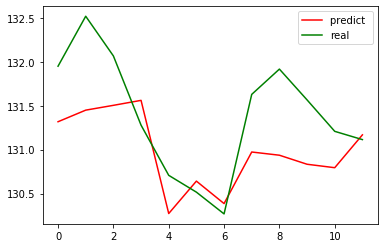

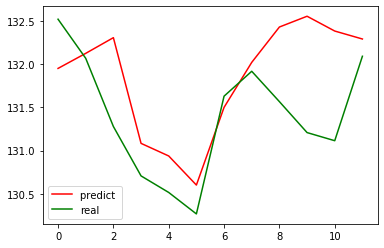

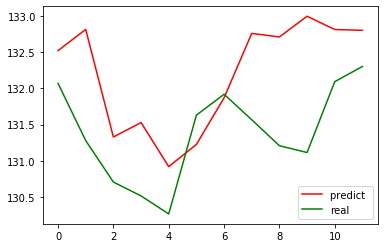

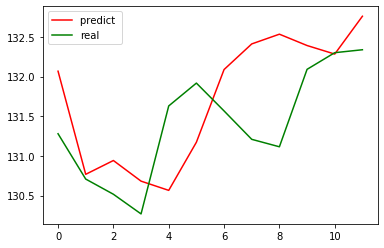

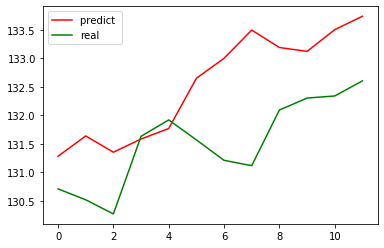

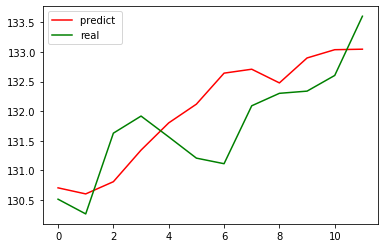

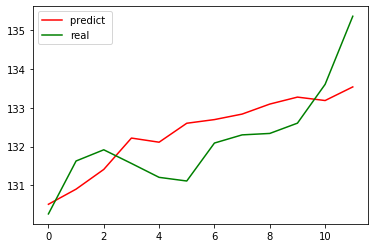

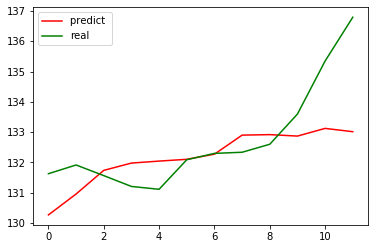

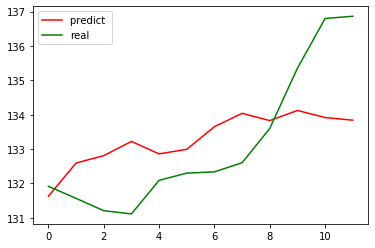

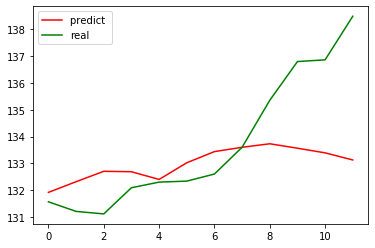

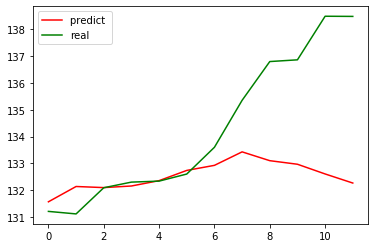

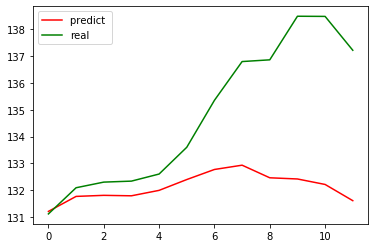

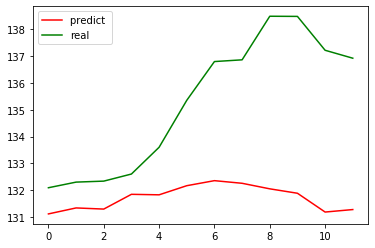

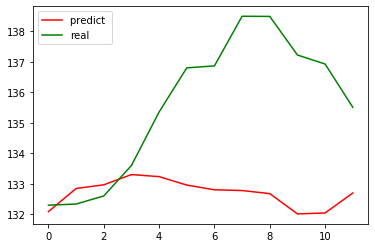

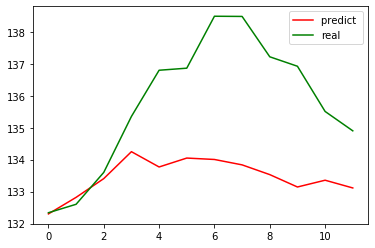

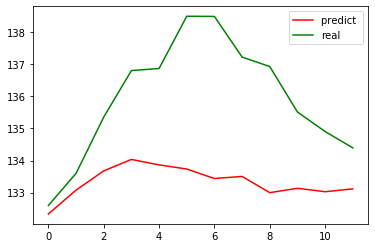

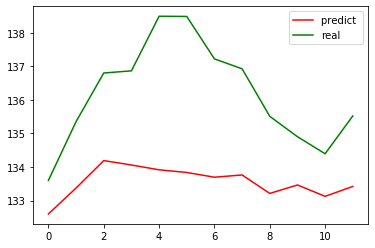

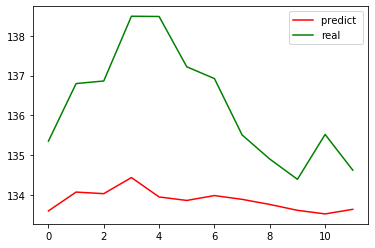

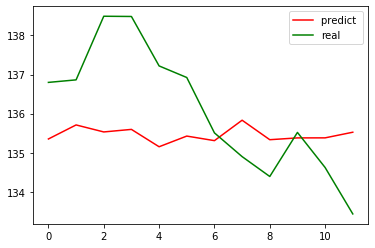

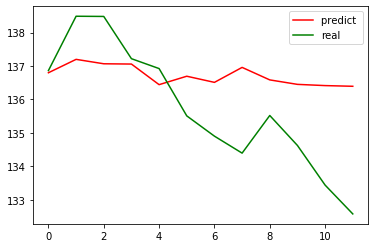

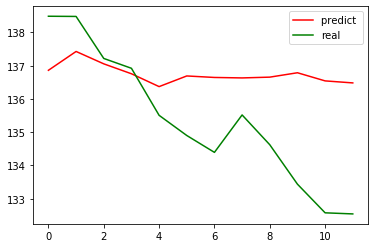

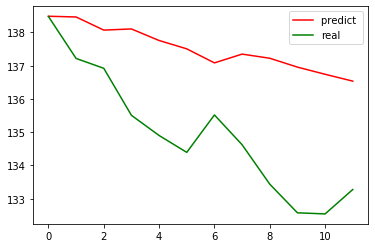

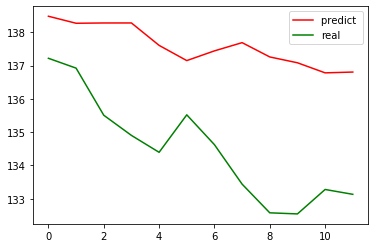

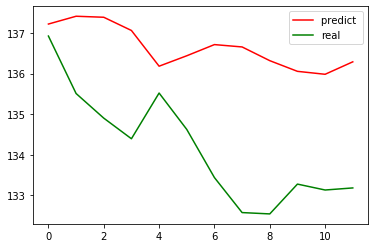

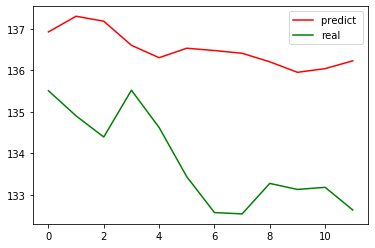

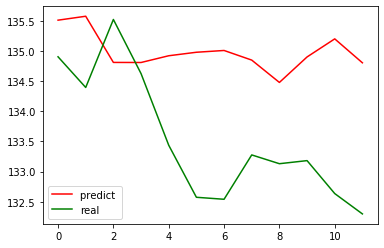

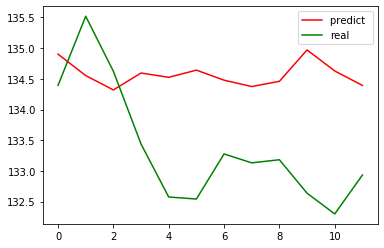

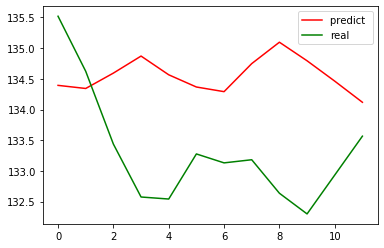

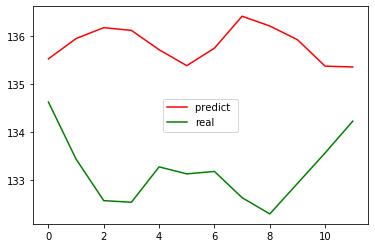

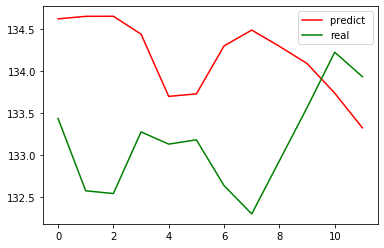

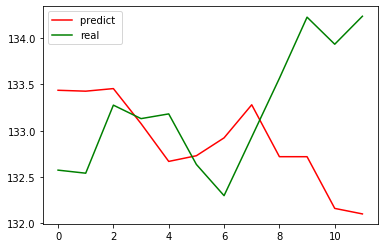

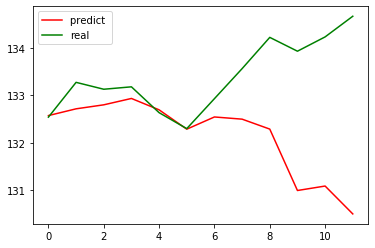

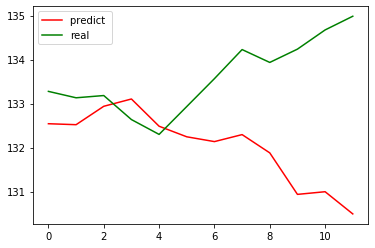

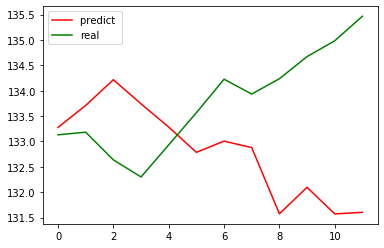

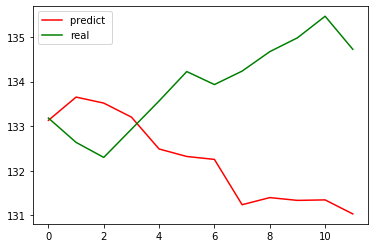

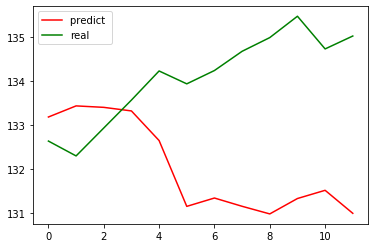

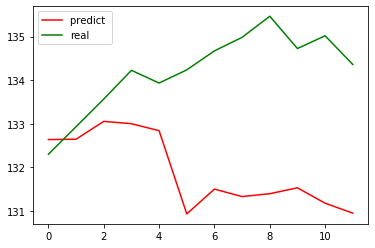

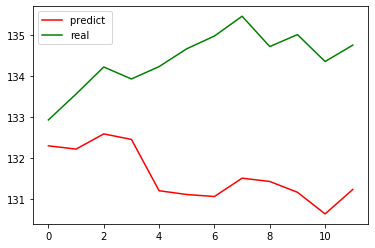

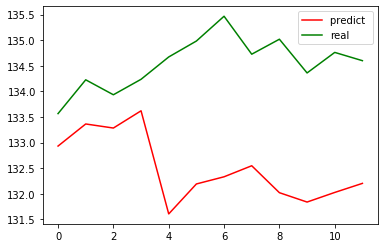

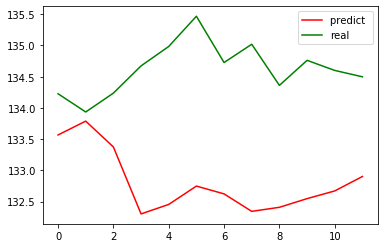

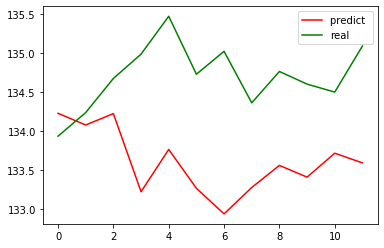

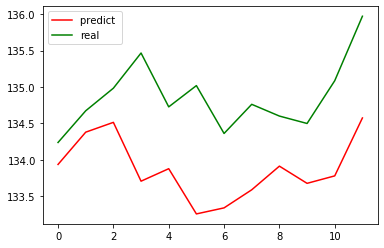

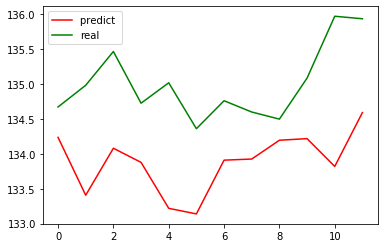

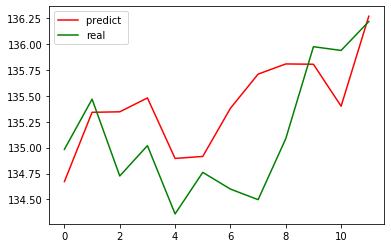

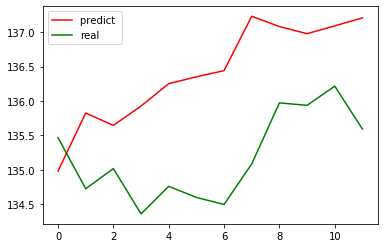

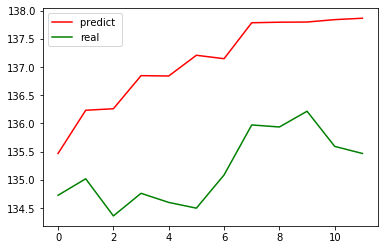

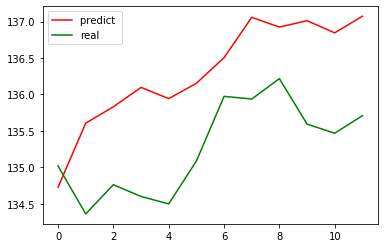

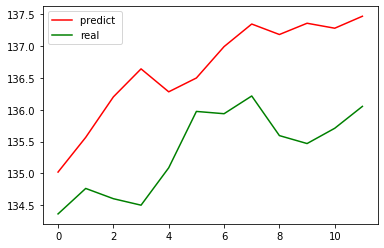

In [45]:
for i in range(len(mean_prediction)):
    predict_num = i
    PlotChart(mean_prediction[predict_num], validation_results[predict_num])

In [46]:
os_x_2 =[]
for i in range (50):
    os_x_2.append(i)
    
    

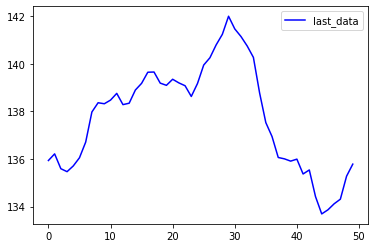

In [47]:
plt.plot(os_x_2,new_data_arr_real[0], 'b',label = 'last_data')  ## смотрим график последних 50 свечек
plt.legend()
plt.show()

In [48]:
prediction3 = model_1_KNR.predict(new_data_arr_real)

In [49]:
prediction3

array([[129.101 , 129.782 , 131.0815, 132.0345, 132.0995, 132.5835,
        134.292 , 135.4635, 134.181 , 132.447 , 131.904 , 132.577 ]])

In [50]:
prediction4 = model_2_KNR.predict(new_data_arr_real)

In [51]:
prediction4

array([[133.227 , 134.178 , 133.182 , 132.291 , 131.598 , 131.5205,
        131.452 , 131.201 , 131.417 , 130.702 , 130.816 , 131.664 ]])

<function matplotlib.pyplot.show(*args, **kw)>

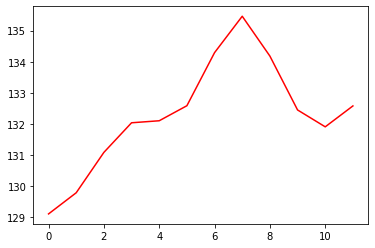

In [52]:
plt.plot(os_x_for_predict, prediction3[0], 'r', label = 'prediction')
plt.show

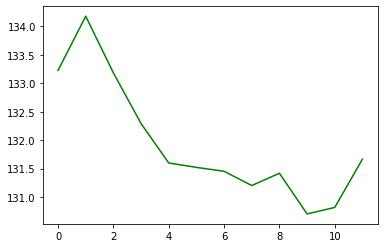

In [53]:
plt.plot(os_x_for_predict, prediction4[0], 'g', label = 'prediction')
plt.show()

In [54]:
print("DELTA", abs(prediction3[0,0] - prediction3[0,-1]))

DELTA 3.475999999999999


In [55]:
print("DELTA", abs(prediction4[0,0] - prediction4[0,-1]))

DELTA 1.5630000000000166


In [56]:
predict4_todf = pd.DataFrame(prediction4[0], columns = ['col'])

In [57]:
type(predict4_todf)

pandas.core.frame.DataFrame

In [58]:
predict4_todf

col
0   133.2270
1   134.1780
2   133.1820
3   132.2910
4   131.5980
5   131.5205
6   131.4520
7   131.2010
8   131.4170
9   130.7020
10  130.8160
11  131.6640

In [59]:
predict4_todf.to_csv('C:\\Users\\User\\AppData\\Roaming\\MetaQuotes\\Terminal\\287469DEA9630EA94D0715D755974F1B\\tester\\files\\PredictD1.csv')

In [60]:
with open ('C:\\Users\\User\\AppData\\Roaming\\MetaQuotes\\Terminal\\287469DEA9630EA94D0715D755974F1B\\MQL4\\Files\\Predict1.txt', 'w') as ouf:
    for i in prediction4[0]:
        ouf.write(str(i)+ "\n")

In [61]:
test_arr = np.zeros((3,2))
print(test_arr)
test_arr[0,0] =1
test_arr[0,1] =2
test_arr[1,0] =3
test_arr[1,1] =4
print(test_arr)
for i in test_arr[0]:
    print(i)

[[0. 0.]
 [0. 0.]
 [0. 0.]]
[[1. 2.]
 [3. 4.]
 [0. 0.]]
1.0
2.0


In [62]:
296500/5.7


52017.54385964912

In [63]:
a=296500
b=5.7
print(a/b)

52017.54385964912


In [64]:
print(5)

5


In [65]:
##from sklearn.externals import joblib
## joblib.dump(model_2_KNR, "model_2_KNR.pkl")

In [66]:
arr1 = np.array([1, 2, 3])
arr2 = np.array([1, 2, 3])
arr3 = np.array([1, 2, 3])

In [67]:
summ_arr= np.zeros((3))

In [68]:
for i in range(len(summ_arr)):
    sum_arr[i] = 

SyntaxError: invalid syntax (<ipython-input-68-2210c58d5ed2>, line 2)